<a href="https://colab.research.google.com/github/IsidroJ/Colab_Archivos_Clase_PADP/blob/main/2do_avance_ProyectoProgADAP_261550.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Control y optimización del inventario en productos perecederos**


**Etapas: Métricas de Calidad de los Datos, Análisis Descriptivo y Preprocesamiento**

Nombre: Isidro Jesús González Hernández

Matrícula: 261550

Fecha: 01/10/2025

## **1) Introducción**

La cadena de suministro agroalimentaria (CSA) está asociada con las etapas de la producción de alimentos agrícolas, particularmente "de la granja a la mesa", es decir, desde las etapas de cultivo/cria,  producción, procesamiento, comercio, distribución y consumo (Kafi et al., 2025). Entre los principales desafíos de las CSA destacan:
1. Desafíos ambientales y globales.
2. Gestión de la demanda y el suministro.
3. Operaciones de producción y logística.
4. Costos y sostenibilidad.
5. Gestión de inventarios y trazabilidad.
6. Gestión del tiempo.

Bajo este contexto, muchos alimentos son altamente perecederos (frutas, vegetales, lácteos, carnes). Lo que implica gestionar efizcazmente el inventario en todas las etapas de la CSA. Por ejemplo, la incertidumbre en la demanda propicia que los prónosticos no coincidan con las ventas reales. Esto complica definir cuánto pedir, cuándo hacerlo y cuánto mantener en inventario.

**Objetivo del proyecto:**
Optimizar la gestión del inventario mediante el seguimiento de las cantidades de existencias, los umbrales mínimos y las cantidades de reordenamiento, mediante la aplicación de inteligencia artificial.


**Contexto del dataset:**
El conjunto de datos esta relacionado a las ventas de productos lácteos, el cual proporciona una recopilación detallada de datos relacionados con granjas lecheras, productos lácteos, ventas e inventario. En este sentido, el proyecto pretende abordar el problema de optimizar los nivesles de inventario de productos perecederos con fin de maximizar ganacias y evitar desperdicios.  


## **2) Descripción del dataset**

**Fuente de los datos.**

El conjunto de datos se obtuvo de la plataforma Kaggle:

https://www.kaggle.com/datasets/suraj520/dairy-goods-sales-dataset/data  

<br>

**Número de registros y variables.**

La base de datos contiene 4325 filas y 23 columndas (variables).

<br>

**Variables principales de interés.**

El conjunto de datos contiene 23 variables de las cuales 9 son de interes para este proyecto. Acontinuación se enlistan todas las variables y se marcan las de interes:

1. Location: Ubicación geográfica de la granja lechera.
2. Total Land Area (acres): Superficie total del terreno ocupada por la granja lechera.
3. Number of Cows: Número de vacas presentes en la granja lechera.
4. Farm Size: Tamaño de la granja lechera (en kilómetros cuadrados).
5. Date: Fecha del registro de los datos.
6. **Product ID: Identificador único de cada producto lácteo.**
7. Product Name: Nombre del producto lácteo.
8. Brand: Marca asociada al producto lácteo.
9. **Quantity (liters/kg): Cantidad de producto lácteo disponible.**
10. **Price per Unit: Precio por unidad del producto lácteo.**
11. Total Value: Valor total de la cantidad disponible del producto lácteo.
12. **Shelf Life (days): Vida útil del producto lácteo en días.**
13. Storage Condition: Condición de almacenamiento recomendada para el producto lácteo.
14. Production Date: Fecha de producción del producto lácteo.
15. Expiration Date: Fecha de vencimiento del producto lácteo.
16. **Quantity Sold (liters/kg): Cantidad de producto lácteo vendido.**
17. **Price per Unit (sold): Precio por unidad al que se vendió el producto lácteo.**
18. Approx. Total Revenue (INR): Ingresos totales aproximados generados por la venta del producto lácteo.
19. Customer Location: Ubicación del cliente que compró el producto lácteo.
20. Sales Channel: Canal a través del cual se vendió el producto lácteo (minorista, mayorista, en línea).
21. **Quantity in Stock (liters/kg): La cantidad de producto lácteo que queda en stock.**
22. **Minimum Stock Threshold (liters/kg): El umbral mínimo de existencias del producto lácteo.**
23. **Reorder Quantity (liters/kg): La cantidad recomendada para reordenar del producto lácteo.**

<br>

**Limitaciones del dataset.**

Para determinar los niveles óptimos de inventario se requieren de datos como el costo de hacer una orden y costo de mantener el inventario. Sin embargo, no es una limitación importante para determinar niveles óptimos de inventarios. Desde el contexto, de la asignatura no se podrán abordar todos los temas que se han visto en clase, por ejemplo, trabajar con datos nulos.

**A continuación, se presenta una exploración básica de los datos.**

In [68]:
import pandas as pd
from IPython.display import display, HTML
import numpy as np


df = pd.read_csv("/content/drive/MyDrive/1_ClassFiles/0_Proyecto/dairy_dataset.csv")

display(HTML("<h3 style='color:blue; font-size:18px;'> Vista rápida del conjunto de datos </h3>"))
print('\n')

df.head()

Location  Total Land Area (acres)  Number of Cows Farm Size  \
0      Telangana                   310.84              96    Medium   
1  Uttar Pradesh                    19.19              44     Large   
2     Tamil Nadu                   581.69              24    Medium   
3      Telangana                   908.00              89     Small   
4    Maharashtra                   861.95              21    Medium   

         Date  Product ID Product Name                 Brand  \
0  2022-02-17           5    Ice Cream           Dodla Dairy   
1  2021-12-01           1         Milk                  Amul   
2  2022-02-28           4       Yogurt           Dodla Dairy   
3  2019-06-09           3       Cheese  Britannia Industries   
4  2020-12-14           8   Buttermilk          Mother Dairy   

   Quantity (liters/kg)  Price per Unit  ...  Production Date  \
0                222.40           85.72  ...       2021-12-27   
1                687.48           42.61  ...       2021-10-03   
2                503.48           36.50  ...       2022-01-14   
3                823.36           26.52  ...       2019-05-15   
4                147.77           83.85  ...       2020-10-17   

   Expiration Date Quantity Sold (liters/kg) Price per Unit (sold)  \
0       2022-01-21                         7                 82.24   
1       2021-10-25                       558                 39.24   
2       2022-02-13                       256                 33.81   
3       2019-07-26                       601                 28.92   
4       2020-10-28                       145                 83.07   

  Approx. Total Revenue(INR)  Customer Location  Sales Channel  \
0                     575.68     Madhya Pradesh      Wholesale   
1                   21895.92             Kerala      Wholesale   
2                    8655.36     Madhya Pradesh         Online   
3                   17380.92          Rajasthan         Online   
4                   12045.15          Jharkhand         Retail   

   Quantity in Stock (liters/kg) Minimum Stock Threshold (liters/kg)  \
0                            215                               19.55   
1                            129                               43.17   
2                            247                               15.10   
3                            222                               74.50   
4                              2                               76.02   

  Reorder Quantity (liters/kg)  
0                        64.03  
1                       181.10  
2                       140.83  
3                        57.68  
4                        33.40  

[5 rows x 23 columns]

In [69]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Tamño del conjunto de datos: cantidad de filas y columnas </h3>"))
print('\n')
print(df.shape)



(4325, 23)


In [70]:

display(HTML("<h3 style='color:blue; font-size:18px;'> Nombre de las columnas </h3>"))
print('\n')

dfNomCol = pd.DataFrame({"Nombre:": df.columns})
print(dfNomCol)



                                Nombre:
0                              Location
1               Total Land Area (acres)
2                        Number of Cows
3                             Farm Size
4                                  Date
5                            Product ID
6                          Product Name
7                                 Brand
8                  Quantity (liters/kg)
9                        Price per Unit
10                          Total Value
11                    Shelf Life (days)
12                    Storage Condition
13                      Production Date
14                      Expiration Date
15            Quantity Sold (liters/kg)
16                Price per Unit (sold)
17           Approx. Total Revenue(INR)
18                    Customer Location
19                        Sales Channel
20        Quantity in Stock (liters/kg)
21  Minimum Stock Threshold (liters/kg)
22         Reorder Quantity (liters/kg)


In [71]:
display(HTML("<h3 style='color:blue; font-size:18px;'> La informacion del conjunto de datos es: </h3>"))
print('\n')
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)           

## **3) Preguntas del análisis descriptivo**


1. ¿Cómo se comparta la distribución de las principales variables de estudio?

2. ¿Qué diferencias relevantes existen entre los productos con respecto a caducidad, ventas, cantidad en stock, inventario de seguridad y punto de reorden?

3. ¿Cuál es la clasificación ABC de los productos por ventas?


## **4) Métricas de calidad de los datos**

In [72]:
from IPython.display import display, Markdown


CDF = df.isna().sum()    #CDF: Cantidad de Datos Faltantes
PDF = (CDF / len(df) * 100).round(2)   #PDF: Porcentaje de Datos Faltantes
completeness = pd.DataFrame({
    "Variables": df.columns,
    "Datos Faltantes": CDF.values,
    "Porcentaje de Faltantes": PDF.values
}).sort_values("Porcentaje de Faltantes", ascending=False)


display(HTML("<h3 style='color:blue; font-size:18px;'> Completitud: Conteo y porcentaje de valores faltantes </h3>"))
print('\n')
display(completeness)


Variables  Datos Faltantes  \
0                              Location                0   
1               Total Land Area (acres)                0   
2                        Number of Cows                0   
3                             Farm Size                0   
4                                  Date                0   
5                            Product ID                0   
6                          Product Name                0   
7                                 Brand                0   
8                  Quantity (liters/kg)                0   
9                        Price per Unit                0   
10                          Total Value                0   
11                    Shelf Life (days)                0   
12                    Storage Condition                0   
13                      Production Date                0   
14                      Expiration Date                0   
15            Quantity Sold (liters/kg)                0   
16                Price per Unit (sold)                0   
17           Approx. Total Revenue(INR)                0   
18                    Customer Location                0   
19                        Sales Channel                0   
20        Quantity in Stock (liters/kg)                0   
21  Minimum Stock Threshold (liters/kg)                0   
22         Reorder Quantity (liters/kg)                0   

    Porcentaje de Faltantes  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
5                       0.0  
6                       0.0  
7                       0.0  
8                       0.0  
9                       0.0  
10                      0.0  
11                      0.0  
12                      0.0  
13                      0.0  
14                      0.0  
15                      0.0  
16                      0.0  
17                      0.0  
18                      0.0  
19                      0.0  
20                      0.0  
21                      0.0  
22                      0.0

### **Completitud**

El porcentaje de datos presentes (no nulos) respecto de los requeridos. Puede medirse:
* A nivel columna: % de valores no nulos.
* A nivel registro: % de campos llenos por fila.
* A nivel negocio: % de atributos críticos completos.

La **completitud** importa porque los faltantes pueden distorsionar el análisis y las decisiones: eliminar filas o columnas incompletas (listwise/pairwise) introduce sesgos en medias, varianzas y correlaciones cuando los datos no son MCAR; además, reduce el poder estadístico, ampliando intervalos e inestabilizando los modelos. En ML, los vacíos rompen pipelines, complican el feature engineering y degradan métricas como RMSE, F1 o AUC. Operativamente, en cadenas agroalimentarias, carecer de fechas de caducidad o cantidad vendida de producto impide aplicar FEFO (First-Expire, First-Out), estimar la demanda y prevenir rupturas o mermas. Y desde el ángulo de cumplimiento y trazabilidad, campos incompletos (lote, proveedor) dificultan auditorías y recalls.

In [73]:
TipoDato = {
    'Location': 'object',
    'Total Land Area (acres)': 'float64',
    'Number of Cows': 'int64',
    'Farm Size': 'object',
    'Date': 'date',
    'Product ID': 'int64',
    'Product Name': 'object',
    'Brand': 'object',
    'Quantity (liters/kg)': 'float64',
    'Price per Unit': 'float64',
    'Total Value': 'float64',
    'Shelf Life (days)': 'int64',
    'Storage Condition': 'object',
    'Production Date': 'date',
    'Expiration Date': 'date',
    'Quantity Sold (liters/kg)': 'int64',
    'Price per Unit (sold)': 'float64',
    'Approx. Total Revenue(INR)': 'float64',
    'Customer Location': 'object',
    'Sales Channel': 'object',
    'Quantity in Stock (liters/kg)': 'int64',
    'Minimum Stock Threshold (liters/kg)': 'float64',
    'Reorder Quantity (liters/kg)': 'float64',
}

# --- Inferencia de tipo (fallback si no está en SCHEMA) ---
def AnalisisTipoDato(col: pd.Series):
    s = col.dropna()
    if s.empty:
        return 'string'
    # numérico
    if pd.to_numeric(s.astype(str).str.replace(',', '.', regex=False), errors='coerce').notna().mean() >= 0.9:
        return 'numeric'
    # fecha
    if pd.to_datetime(s, errors='coerce', infer_datetime_format=True).notna().mean() >= 0.9:
        return 'date'
    # boolean
    vals = set(s.astype(str).str.lower().unique())
    if vals.issubset({'true','false','1','0','si','sí','no','yes'}):
        return 'boolean'
    # categórica (pocas categorías relativas)
    if s.nunique(dropna=True) <= max(20, 0.05 * len(s)):
        return 'categorical'
    return 'string'

def summarize_types(df: pd.DataFrame, schema: dict | None = None) -> pd.DataFrame:
    rows = []
    for col in df.columns:
        actual = str(df[col].dtype)
        correcto = (schema or {}).get(col, None)
        if correcto is None:
            correcto = AnalisisTipoDato(df[col])
        rows.append({
            'Variable': col,
            'Tipo de dato': actual,
            'Tipo correcto': correcto,
        })
    return pd.DataFrame(rows)

# --- Ejecutar el resumen ---
resumen = summarize_types(df, schema=TipoDato)
display(HTML("<h3 style='color:blue; font-size:18px;'> Consistencia: Tipo de dato correcto </h3>"))
print('\n')
display(resumen)


Variable Tipo de dato Tipo correcto
0                              Location       object        object
1               Total Land Area (acres)      float64       float64
2                        Number of Cows        int64         int64
3                             Farm Size       object        object
4                                  Date       object          date
5                            Product ID        int64         int64
6                          Product Name       object        object
7                                 Brand       object        object
8                  Quantity (liters/kg)      float64       float64
9                        Price per Unit      float64       float64
10                          Total Value      float64       float64
11                    Shelf Life (days)        int64         int64
12                    Storage Condition       object        object
13                      Production Date       object          date
14                      Expiration Date       object          date
15            Quantity Sold (liters/kg)        int64         int64
16                Price per Unit (sold)      float64       float64
17           Approx. Total Revenue(INR)      float64       float64
18                    Customer Location       object        object
19                        Sales Channel       object        object
20        Quantity in Stock (liters/kg)        int64         int64
21  Minimum Stock Threshold (liters/kg)      float64       float64
22         Reorder Quantity (liters/kg)      float64       float64

### **Consistencia**

La consistencia (Consistency) en calidad de datos es la coherencia interna y uniformidad con la que un mismo concepto se registra a lo largo del tiempo y entre sistemas (mismos tipos, formatos y unidades); es crucial porque garantiza KPIs comparables, uniones entre tablas sin pérdidas ni duplicidades, y pipelines de analítica/ML estables—si las unidades varían (“L”, “litros”, “lts.”), las fechas cambian de formato o se rompen reglas como Fecha de caducidad ≥ Fecha de producción o Tiempo de vida ≈ Caducidad - producción, los cálculos, pronósticos y decisiones se vuelven erráticos y propensos a errores, además de complicar el cumplimiento y la trazabilidad en auditorías; por ello, conviene estandarizar tipos y unidades, usar catálogos/llaves estables y automatizar validaciones de reglas para prevenir inconsistencias antes de reportar o modelar.

En nuestro caso sólo se puedo idenficar errores en el tipo de dato paras las fechas. En este sentido se hara converción en la sección 6 de este proyectyo.

In [74]:
import re
ColumnasFecha = ['Date', 'Production Date', 'Expiration Date']
FormatoCorrecto = '%Y-%m-%d'
ExpRegular = re.compile(r'^\d{4}-\d{2}-\d{2}$')

def AnalisisFecha(series: pd.Series,
                              expected_format: str,
                              strict_regex: re.Pattern) -> bool:
    s_str = series.astype(str)
    match_pattern = s_str.str.match(strict_regex)
    parsed = pd.to_datetime(series, format=expected_format, errors='coerce')
    return bool((match_pattern & parsed.notna()).all())

# --- Construir resultado (2 columnas) ---
rows = []
for col in ColumnasFecha:
    if col in df.columns:
        ok = AnalisisFecha(df[col], FormatoCorrecto, ExpRegular)
        rows.append({'Columna': col, 'Fecha correcta': 'Correcto' if ok else 'Incorrecto'})
    else:
        rows.append({'Columna': col, 'Fecha correcta': 'Incorrecto'})  # columna ausente

resultado = pd.DataFrame(rows, columns=['Columna', 'Fecha correcta'])
display(HTML("<h3 style='color:blue; font-size:18px;'> Consistencia: Formato correcto de fechas </h3>"))
print('\n')
display(resultado)

Columna Fecha correcta
0             Date       Correcto
1  Production Date       Correcto
2  Expiration Date       Correcto

In [75]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Validar las plabras en la columna de Tamaño de la Granja </h3>"))
print('\n')

VPTG = {"Large", "Medium", "Small"}

df["Farm Size Chequeo"] = df["Farm Size"].apply(
    lambda x: "Correcto" if x in VPTG else "Incorrecto"
)

# Mostrar resumen
display(df["Farm Size Chequeo"].value_counts())
print('\n')
print('\033[1m Valores diferentes encontrados en Farm Size: \033[0m')
display(df.loc[df["Farm Size Chequeo"] == "Incorrecto", "Farm Size"].unique())

Farm Size Chequeo
Correcto    4325
Name: count, dtype: int64



 Valores diferentes encontrados en Farm Size: 


array([], dtype=object)

In [76]:
RevisarColumnas = [
    "Product ID",
    "Location",
    "Farm Size",
    "Product Name",
    "Brand",
    "Storage Condition",
    "Customer Location",
    "Sales Channel"
]

display(HTML("<h3 style='color:blue; font-size:18px;'> Unicidad: Identificación de valores únicos en la columna 'Product ID' y las que contengan texto </h3>"))
print('\n')

for columnas in RevisarColumnas:
    if columnas in df.columns:
        formato = df[columnas].value_counts()
        display(formato)


Product ID
6     479
7     447
9     441
4     437
8     435
2     431
1     429
5     423
10    402
3     401
Name: count, dtype: int64

Location
Delhi             525
Chandigarh        519
Uttar Pradesh     276
Gujarat           267
Karnataka         261
Madhya Pradesh    259
Rajasthan         256
Maharashtra       255
Haryana           253
Kerala            249
Telangana         248
Jharkhand         248
Bihar             245
West Bengal       241
Tamil Nadu        223
Name: count, dtype: int64

Farm Size
Large     1462
Medium    1439
Small     1424
Name: count, dtype: int64

Product Name
Curd          479
Lassi         447
Paneer        441
Yogurt        437
Buttermilk    435
Butter        431
Milk          429
Ice Cream     423
Ghee          402
Cheese        401
Name: count, dtype: int64

Brand
Amul                    1053
Mother Dairy            1010
Raj                      685
Sudha                    648
Dodla Dairy              222
Palle2patnam             211
Dynamix Dairies          106
Warana                   104
Parag Milk Foods         102
Passion Cheese            96
Britannia Industries      88
Name: count, dtype: int64

Storage Condition
Refrigerated        2459
Frozen              1035
Ambient              402
Polythene Packet     225
Tetra Pack           204
Name: count, dtype: int64

Customer Location
Delhi             499
Chandigarh        489
Bihar             284
Maharashtra       271
Kerala            267
Uttar Pradesh     267
Tamil Nadu        267
West Bengal       264
Karnataka         264
Telangana         251
Madhya Pradesh    248
Gujarat           248
Jharkhand         243
Rajasthan         234
Haryana           229
Name: count, dtype: int64

Sales Channel
Retail       1478
Wholesale    1476
Online       1371
Name: count, dtype: int64

In [77]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Unicidad: Identificación de valores únicos por clave de columnas </h3>"))
print('\n')

combinaciones = ["Location", "Product ID", "Product Name", "Production Date", "Brand"]

n_filas = len(df)

n_combinaciones = df[combinaciones].drop_duplicates().shape[0]

pct_combinaciones = round(100 * n_combinaciones / n_filas, 2)

filas_duplicadas = int(df.duplicated(subset=combinaciones).sum())

dup_groups = (
    df.groupby(combinaciones, dropna=False)
      .size()
      .reset_index(name="count")
      .query("count > 1")
      .sort_values("count", ascending=False)
)

print("----- RESUMEN DE UNICIDAD -----")
print(f"Filas totales:                 {n_filas}")
print(f"Claves únicas (combinaciones): {n_combinaciones}")
print(f"% unicidad de la clave:        {pct_combinaciones}%")
print(f"Filas duplicadas por clave:    {filas_duplicadas}")

print("\n----- TOP combinaciones duplicadas -----")
print(dup_groups.to_string(index=False) if not dup_groups.empty else "No hay combinaciones duplicadas.")





----- RESUMEN DE UNICIDAD -----
Filas totales:                 4325
Claves únicas (combinaciones): 4313
% unicidad de la clave:        99.72%
Filas duplicadas por clave:    12

----- TOP combinaciones duplicadas -----
      Location  Product ID Product Name Production Date           Brand  count
    Chandigarh           5    Ice Cream      2019-07-10    Mother Dairy      2
    Chandigarh           7        Lassi      2020-06-16            Amul      2
    Chandigarh           8   Buttermilk      2020-05-10            Amul      2
    Chandigarh          10         Ghee      2020-07-07           Sudha      2
         Delhi           1         Milk      2020-01-30            Amul      2
         Delhi           1         Milk      2022-11-05    Mother Dairy      2
         Delhi           5    Ice Cream      2021-01-16    Palle2patnam      2
         Delhi           9       Paneer      2021-02-23             Raj      2
       Gujarat           3       Cheese      2021-12-22 Dynamix Dairi

### **Unicidad**

La unicidad (Uniqueness) asegura que cada entidad o el dato esté representado una sola vez conforme a su clave (simple o compuesta (ID del producto + Nombre del producto + Fecha de producción), evitando registros repetidos o casi duplicados que inflan los KPIs, sesgan análisis y entrenamientos de ML; cuando existen duplicados pueden aparecer resultados sobredimensionados, tasas distorsionadas y decisiones operativas erróneas (reposición, pronósticos, control de lotes). Para garantizar la unicidad, se deben definir claves primarias y restricciones de unicidad desde el origen.

In [78]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Duplicación: Identificación de filas duplicadas </h3>"))
print('\n')

duplicados_totales = df.duplicated().sum()
display(duplicados_totales)

np.int64(0)

In [79]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Duplicación: Verificar duplicados en columnas específicas </h3>"))
print('\n')

ColumnasClave = ["Date", "Product ID", "Product Name", "Customer Location"]

DuplicadosClave = df.duplicated(subset=ColumnasClave).sum()
#print(f"\nDuplicados en base a {ColumnasClave}: {DuplicadosClave}")

if DuplicadosClave > 0:
    display(df[df.duplicated(subset=ColumnasClave, keep=False)].sort_values(ColumnasClave))

Location  Total Land Area (acres)  Number of Cows Farm Size  \
2172           Delhi                   360.64              52     Large   
3180       Rajasthan                   304.49              64    Medium   
1513   Uttar Pradesh                   929.93              29     Large   
3190         Gujarat                   506.33              58     Large   
975       Tamil Nadu                   863.23              34    Medium   
...              ...                      ...             ...       ...   
2911      Chandigarh                   326.96              21    Medium   
2112     West Bengal                   963.65              64     Large   
4151     Maharashtra                   911.98              46     Large   
258   Madhya Pradesh                   123.53              37    Medium   
3598     West Bengal                    79.60              80     Small   

            Date  Product ID Product Name             Brand  \
2172  2019-01-26           9       Paneer      Mother Dairy   
3180  2019-01-26           9       Paneer      Mother Dairy   
1513  2019-02-05           6         Curd              Amul   
3190  2019-02-05           6         Curd      Mother Dairy   
975   2019-03-05          10         Ghee             Sudha   
...          ...         ...          ...               ...   
2911  2022-09-26           3       Cheese    Passion Cheese   
2112  2022-10-09           2       Butter  Parag Milk Foods   
4151  2022-10-09           2       Butter            Warana   
258   2022-12-24           2       Butter            Warana   
3598  2022-12-24           2       Butter              Amul   

      Quantity (liters/kg)  Price per Unit  ...  Expiration Date  \
2172                225.19           10.77  ...       2018-12-09   
3180                942.65           13.46  ...       2019-01-01   
1513                761.33           60.76  ...       2018-12-30   
3190                584.77           16.35  ...       2019-01-25   
975                 443.29           99.65  ...       2019-03-11   
...                    ...             ...  ...              ...   
2911                 24.80           74.34  ...       2022-09-08   
2112                388.22           52.86  ...       2022-10-12   
4151                648.54           36.73  ...       2022-10-25   
258                 412.57           25.11  ...       2023-01-20   
3598                360.98           25.11  ...       2023-01-19   

      Quantity Sold (liters/kg) Price per Unit (sold)  \
2172                          8                  6.95   
3180                        808                 10.40   
1513                         90                 61.53   
3190                         77                 14.03   
975                         382                103.11   
...                         ...                   ...   
2911                         14                 71.57   
2112                        181                 55.55   
4151                        244                 35.03   
258                         304                 27.85   
3598                        332                 24.38   

     Approx. Total Revenue(INR) Customer Location  Sales Channel  \
2172                      55.60             Bihar         Online   
3180                    8403.20             Bihar      Wholesale   
1513                    5537.70           Haryana         Online   
3190                    1080.31           Haryana         Retail   
975                    39388.02           Gujarat      Wholesale   
...                         ...               ...            ...   
2911                    1001.98        Chandigarh         Retail   
2112                   10054.55     Uttar Pradesh         Retail   
4151                    8547.32     Uttar Pradesh         Retail   
258                     8466.40     Uttar Pradesh         Retail   
3598                    8094.16     Uttar Pradesh      Wholesale   

      Quantity in Stock (liters/kg)

### **Duplicación**

La duplicación (Duplication) es la presencia de registros repetidos—idénticos o casi idénticos y/o información redundante en distintas columnas o sistemas, lo que infla los KPIs, genera sesgos estadísticos y sesgos en los modelos, también puede generar inconsistencias entre fuentes y desperdicia almacenamiento; en operaciones de la CSA puede aparentar sobreinventario cuando el mismo lote fue capturado dos veces con pequeñas variaciones (espacios, mayúsculas, guiones), afectando compras, FEFO y trazabilidad.

En nuestro caso no hay duplicidad en filas completas, pero si se quiere analizar duplicidad por columnas encontraremos varias.

In [80]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Validez: verificar rangos adecuados de las columnas numéricas por Outliers</h3>"))
print('\n')

ColumnasOutliers = [
    "Total Land Area (acres)",
    "Number of Cows",
    "Quantity (liters/kg)",
    "Price per Unit",
    "Total Value",
    "Shelf Life (days)",
    "Quantity Sold (liters/kg)",
    "Price per Unit (sold)",
    "Approx. Total Revenue(INR)",
    "Quantity in Stock (liters/kg)",
    "Minimum Stock Threshold (liters/kg)",
    "Reorder Quantity (liters/kg)",
]

def ResumenOutliers(df, columns):
    rows = []
    for col in columns:
        s = df[col]  # numérica, sin NaN según lo que indicas
        q1 = s.quantile(0.25)
        q3 = s.quantile(0.75)
        iqr = q3 - q1
        LI = 0
        LS = q3 + 1.5 * iqr
        out_n = int(((s < LI) | (s > LS)).sum())

        rows.append({
            "Variable": col,
            "q1": q1,
            "q3": q3,
            "iqr": iqr,
            "LI": LI,
            "LS": LS,
            "Outliers": out_n
        })
    rep = pd.DataFrame(rows, columns=["Variable","q1","q3","iqr","LI","LS","Outliers"])
    return rep

rep = ResumenOutliers(df, ColumnasOutliers)
cols_3dec = ["q1","q3","iqr","LI","LS"]
rep[cols_3dec] = rep[cols_3dec].round(3)

display(rep.sort_values("Outliers", ascending=False))


Variable        q1         q3        iqr  LI  \
5                     Shelf Life (days)    10.000     30.000     20.000   0   
8            Approx. Total Revenue(INR)  2916.650  19504.550  16587.900   0   
6             Quantity Sold (liters/kg)    69.000    374.000    305.000   0   
9         Quantity in Stock (liters/kg)    66.000    387.000    321.000   0   
4                           Total Value  9946.815  40954.441  31007.626   0   
2                  Quantity (liters/kg)   254.170    749.780    495.610   0   
1                        Number of Cows    32.000     77.000     45.000   0   
0               Total Land Area (acres)   252.950    751.250    498.300   0   
3                        Price per Unit    32.460     77.460     45.000   0   
7                 Price per Unit (sold)    32.640     77.460     44.820   0   
10  Minimum Stock Threshold (liters/kg)    32.910     79.010     46.100   0   
11         Reorder Quantity (liters/kg)    64.280    153.390     89.110   0   

           LS  Outliers  
5      60.000       578  
8   44386.400       225  
6     831.500        71  
9     868.500        41  
4   87465.881        37  
2    1493.195         0  
1     144.500         0  
0    1498.700         0  
3     144.960         0  
7     144.690         0  
10    148.160         0  
11    287.055         0

In [81]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Validez: verificar que algunas columnas especificas sean mayores que cero </h3>"))
print('\n')

MayorCero = [
    "Total Land Area (acres)",
    "Number of Cows",
    "Quantity (liters/kg)",
    "Price per Unit",
    "Total Value",
    "Shelf Life (days)",
    "Quantity Sold (liters/kg)",
    "Price per Unit (sold)",
]


def Verificar(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    n = len(df)
    rep = pd.DataFrame({
        "columna": cols,
        "valor min": [df[c].min() for c in cols],
        "valor max": [df[c].max() for c in cols],
        "negativos": [int((df[c] <= 0).sum()) for c in cols],
    })
    rep["Porcentaje correcto"] = ((n - rep["negativos"]) / n * 100).round(2)
    rep["Cumple condicion > 0"] = rep["negativos"].eq(0)
    rep = rep.sort_values(["Cumple condicion > 0", "negativos", "columna"], ascending=[True, False, True]).reset_index(drop=True)
    return rep

rep = Verificar(df, MayorCero)
display(rep)

# Formato bonito (3 decimales para min/max si quieres)
#with pd.option_context('display.float_format', lambda x: f"{x:.3f}"):
 #   display(rep)

columna  valor min   valor max  negativos  \
0             Number of Cows    10.0000    100.0000          0   
1             Price per Unit    10.0300     99.9900          0   
2      Price per Unit (sold)     5.2100    104.5100          0   
3       Quantity (liters/kg)     1.1700    999.9300          0   
4  Quantity Sold (liters/kg)     1.0000    960.0000          0   
5          Shelf Life (days)     1.0000    150.0000          0   
6    Total Land Area (acres)    10.1700    999.5300          0   
7                Total Value    42.5165  99036.3696          0   

   Porcentaje correcto  Cumple condicion > 0  
0                100.0                  True  
1                100.0                  True  
2                100.0                  True  
3                100.0                  True  
4                100.0                  True  
5                100.0                  True  
6                100.0                  True  
7                100.0                  True

### **Validez: rangos adecuados**

La validez (Validity) se refiere a que los datos cumplan las reglas del negocio, dominios permitidos y rangos de los datos definidos para cada variable; no basta con que el tipo sea correcto, también deben tener valores razonables y coherentes con el contexto (por ejemplo, cantidades y precios ≥ 0, tiempo de vida (días) dentro de un intervalo lógico.

### **Puntos a considerar en las métricas de la calidad de los datos.**


* Para este conjunto de datos no se pudo evaluar la métrica de **Exactitud** de los datos, ya que, esta métrica evalúa la exactitud de los datos comparándolos con una fuente o referencia confiable y para estos datos no se tiene una fuente de referencia.
* Para el caso de **Actualidad (Timeliness)** no tiene una aplicación real porque los datos son históricos. Sin embargo, para un análisis real en una cadena de suministro agroalimentaria las fechas son importantes, ya que, si el conjunto de datos contiene fechas desactualizadas puede generar problemas en el inventario y caducidad de productos.


## **5) Análisis descriptivo de los datos**

In [82]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Estadísticos básicos (media, mediana, moda, varianza, percentiles) </h3>"))
print('\n')

df.describe()

Total Land Area (acres)  Number of Cows   Product ID  \
count              4325.000000     4325.000000  4325.000000   
mean                503.483073       54.963699     5.509595   
std                 285.935061       26.111487     2.842979   
min                  10.170000       10.000000     1.000000   
25%                 252.950000       32.000000     3.000000   
50%                 509.170000       55.000000     6.000000   
75%                 751.250000       77.000000     8.000000   
max                 999.530000      100.000000    10.000000   

       Quantity (liters/kg)  Price per Unit   Total Value  Shelf Life (days)  \
count           4325.000000     4325.000000   4325.000000        4325.000000   
mean             500.652657       54.785938  27357.845411          29.127630   
std              288.975915       26.002815  21621.051594          30.272114   
min                1.170000       10.030000     42.516500           1.000000   
25%              254.170000       32.460000   9946.814500          10.000000   
50%              497.550000       54.400000  21869.652900          22.000000   
75%              749.780000       77.460000  40954.441000          30.000000   
max              999.930000       99.990000  99036.369600         150.000000   

       Quantity Sold (liters/kg)  Price per Unit (sold)  \
count                4325.000000             4325.00000   
mean                  248.095029               54.77914   
std                   217.024182               26.19279   
min                     1.000000                5.21000   
25%                    69.000000               32.64000   
50%                   189.000000               54.14000   
75%                   374.000000               77.46000   
max                   960.000000              104.51000   

       Approx. Total Revenue(INR)  Quantity in Stock (liters/kg)  \
count                 4325.000000                    4325.000000   
mean                 13580.265401                     252.068671   
std                  14617.009122                     223.620870   
min                     12.540000                       0.000000   
25%                   2916.650000                      66.000000   
50%                   8394.540000                     191.000000   
75%                  19504.550000                     387.000000   
max                  89108.900000                     976.000000   

       Minimum Stock Threshold (liters/kg)  Reorder Quantity (liters/kg)  
count                          4325.000000                   4325.000000  
mean                             55.826143                    109.107820  
std                              26.301450                     51.501035  
min                              10.020000                     20.020000  
25%                              32.910000                     64.280000  
50%                              56.460000                    108.340000  
75%                              79.010000                    153.390000  
max                              99.990000                    199.950000

In [83]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Tabla de frecuencia para variables categóricas </h3>"))
print('\n')
df.describe(include='object')

Location Farm Size        Date Product Name Brand Storage Condition  \
count      4325      4325        4325         4325  4325              4325   
unique       15         3        1278           10    11                 5   
top       Delhi     Large  2021-01-28         Curd  Amul      Refrigerated   
freq        525      1462          11          479  1053              2459   

       Production Date Expiration Date Customer Location Sales Channel  \
count             4325            4325              4325          4325   
unique            1405            1441                15             3   
top         2022-09-06      2022-02-01             Delhi        Retail   
freq                 9               9               499          1478   

       Farm Size Chequeo  
count               4325  
unique                 1  
top             Correcto  
freq                4325

In [84]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

display(HTML("<h3 style='color:blue; font-size:22px;'> Resumen grafico de las variables </h3>"))
print('\n')
display(HTML("<h3 style='color:blue; font-size:18px;'> Representación de los datos mediante Histogramas </h3>"))
print('\n')

variables = [
    "Total Land Area (acres)",
    "Number of Cows",
    "Quantity (liters/kg)",
    "Price per Unit",
    "Total Value",
    "Shelf Life (days)",
    "Quantity Sold (liters/kg)",
    "Price per Unit (sold)",
    "Approx. Total Revenue(INR)",
    "Quantity in Stock (liters/kg)",
    "Minimum Stock Threshold (liters/kg)",
    "Reorder Quantity (liters/kg)",
]

Densidad = True    # Si escribimos True considerará densidad + KDE (linea de ajuste), pero si se escribe False genera conteos + KDE (linea de ajuste)
nbins = 30

for col in variables:
    s = df[col].to_numpy()

    # Histograma (densidad o conteos)
    figura = px.histogram(
        df, x=col, nbins=nbins,
        histnorm="probability density" if Densidad else None,
        title=f"Distribución de {col}"
    )

    # Estilo
    figura.update_layout(
        plot_bgcolor="whitesmoke",
        title_x=0.5,
        title=dict(text=f"Distribución de los datos de {col}",
                   font=dict(family="Arial", size=18, color="red")),
        xaxis=dict(title=col, titlefont=dict(size=15, color="black")),
        yaxis=dict(title="Densidad" if Densidad else "Frecuencia",  color="black"),
        bargap=0.10
    )
    figura.update_traces(
        hovertemplate="Valor: %{x}<br>" + ("Densidad" if Densidad else "Frecuencia") + ": %{y:.4f}<extra></extra>",
        marker_line_width=0.6,
        marker_line_color="white",
        marker_color="steelblue",
    )

    # KDE
    kde = gaussian_kde(s)
    xgrid = np.linspace(s.min(), s.max(), 400)
    ykde = kde(xgrid)

    if not Densidad:
        # Escalar KDE a conteos aproximando el ancho de bin
        bin_width = (s.max() - s.min()) / nbins if nbins > 0 else 1.0
        ykde = ykde * s.size * bin_width

    figura.add_trace(go.Scatter(
        x=xgrid, y=ykde, mode="lines", name="KDE",
        hovertemplate="x: %{x:.3f}<br>" + ("Densidad" if Densidad else "Frecuencia") + ": %{y:.4f}<extra></extra>"
    ))

    figura.show()

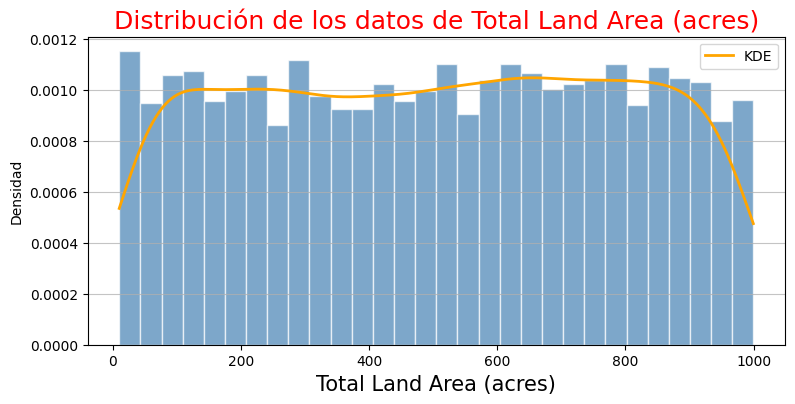

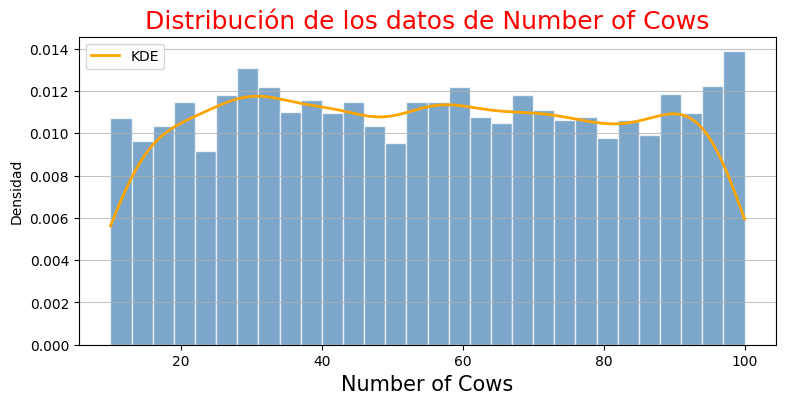

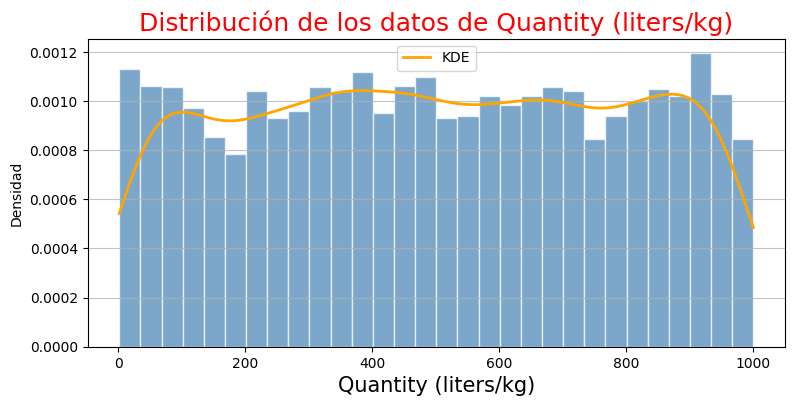

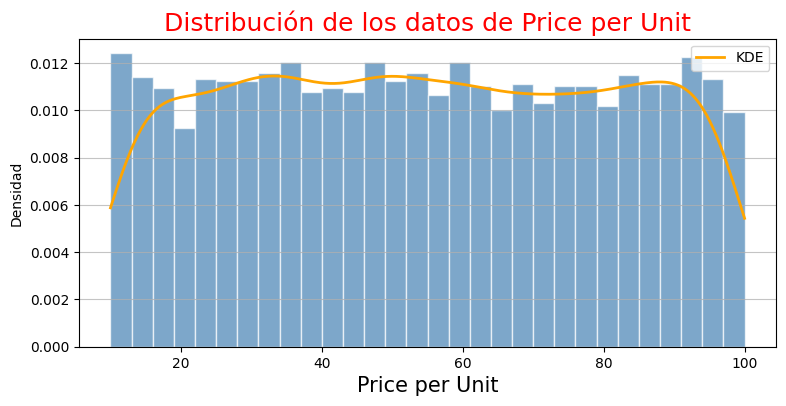

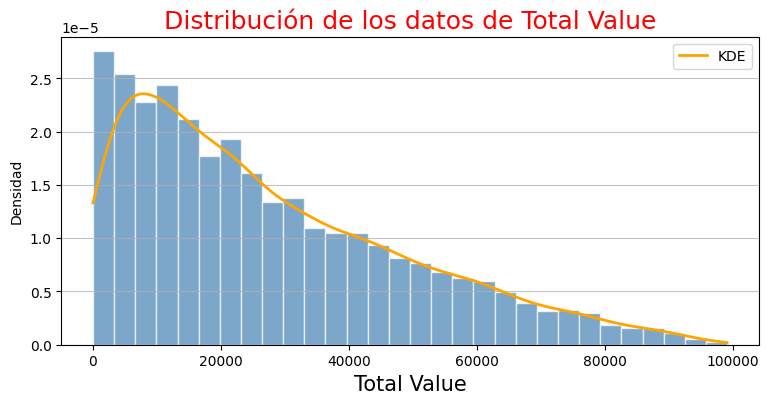

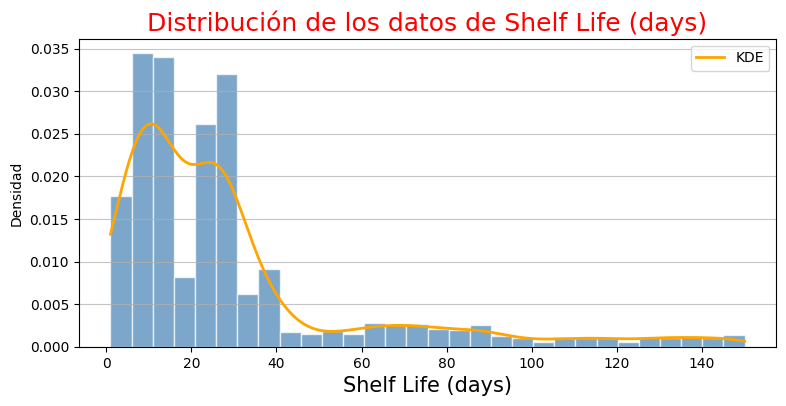

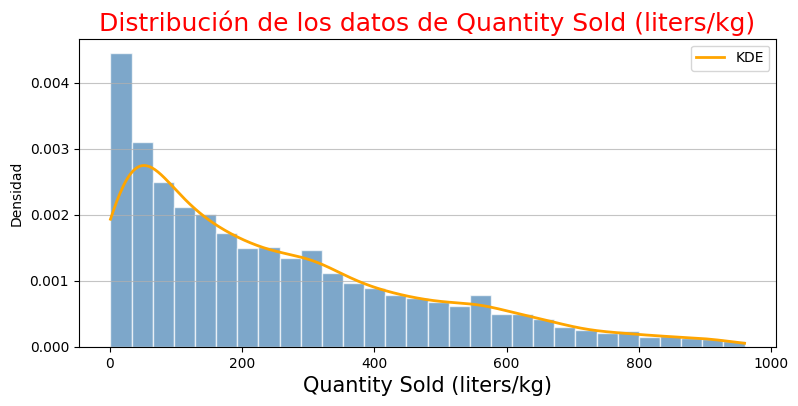

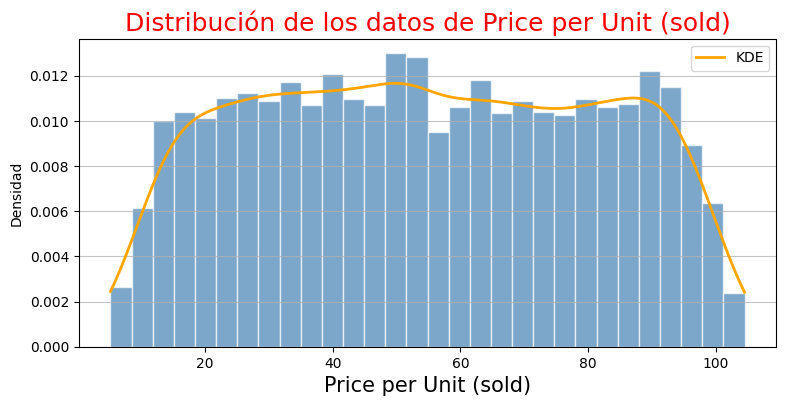

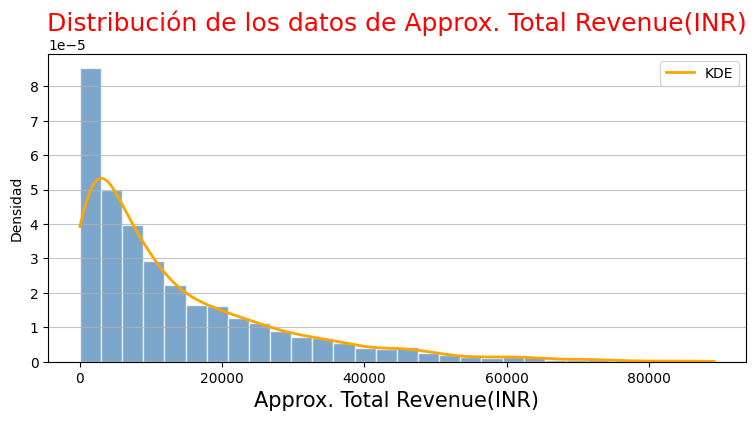

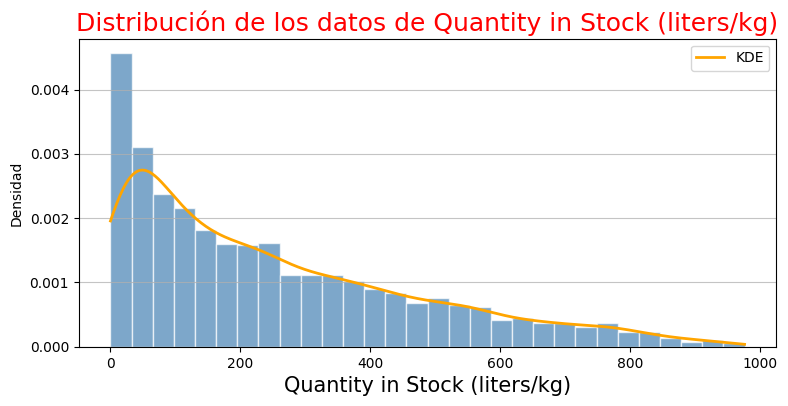

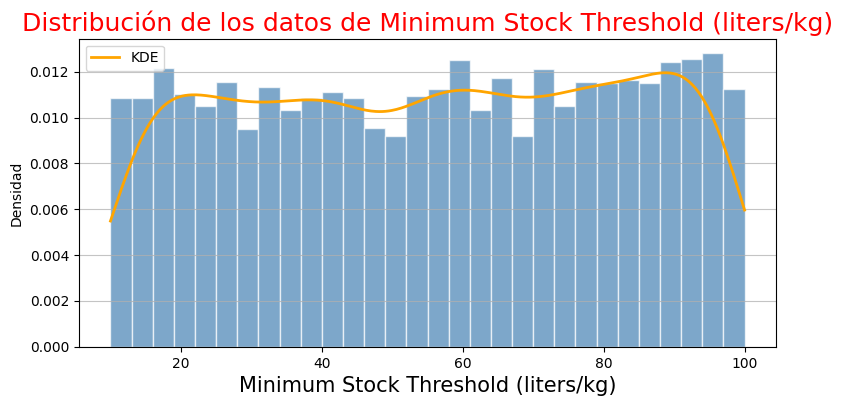

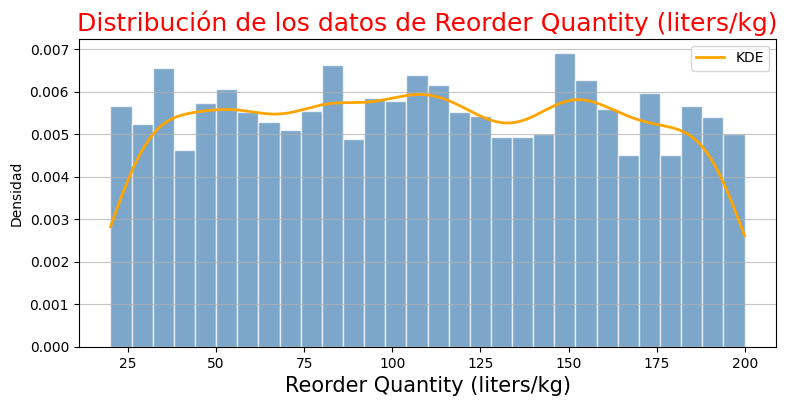

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from IPython.display import display, HTML

display(HTML("<h3 style='color:blue; font-size:22px;'> Resumen grafico de las variables </h3>"))
print('\n')
display(HTML("<h3 style='color:blue; font-size:18px;'> Representación de los datos mediante Histogramas </h3>"))
print('\n')

variables = [
    "Total Land Area (acres)",
    "Number of Cows",
    "Quantity (liters/kg)",
    "Price per Unit",
    "Total Value",
    "Shelf Life (days)",
    "Quantity Sold (liters/kg)",
    "Price per Unit (sold)",
    "Approx. Total Revenue(INR)",
    "Quantity in Stock (liters/kg)",
    "Minimum Stock Threshold (liters/kg)",
    "Reorder Quantity (liters/kg)",
]

Densidad = True    # Si escribimos True considerará densidad + KDE (linea de ajuste), pero si se escribe False genera conteos + KDE (linea de ajuste)
nbins = 30

for col in variables:
    s = df[col].to_numpy()

    plt.figure(figsize=(9, 4)) # Create a figure for each plot

    # Histograma (densidad or counts)
    plt.hist(
        s, # Pass the data array here
        bins=nbins,
        density=Densidad,
        edgecolor='white',
        color='steelblue',
        alpha=0.7 # Add some transparency to the histogram
    )

    plt.title(f"Distribución de los datos de {col}", color="red", fontsize=18)
    plt.xlabel(col, fontsize=15, color="black")
    plt.ylabel("Densidad" if Densidad else "Frecuencia", color="black")
    plt.grid(axis='y', alpha=0.75)

    # KDE (using matplotlib)
    kde = gaussian_kde(s)
    xgrid = np.linspace(s.min(), s.max(), 400)
    ykde = kde(xgrid)

    if not Densidad:
        # Scale KDE to counts approximating the bin width
        # Get histogram bin edges and counts to scale KDE correctly
        counts, bins, _ = plt.hist(s, bins=nbins, density=False, alpha=0) # Plot invisible histogram to get counts and bins
        bin_width = np.diff(bins)[0]
        ykde = ykde * s.size * bin_width
        plt.ylabel("Frecuencia", color="black") # Update label if not density plot


    plt.plot(xgrid, ykde, color='orange', lw=2, label='KDE')

    plt.legend()
    plt.show()

In [86]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Representación de los datos mediante Diagrama de cajas </h3>"))
print('\n')

variables = [
    "Total Land Area (acres)",
    "Number of Cows",
    "Quantity (liters/kg)",
    "Price per Unit",
    "Total Value",
    "Shelf Life (days)",
    "Quantity Sold (liters/kg)",
    "Price per Unit (sold)",
    "Approx. Total Revenue(INR)",
    "Quantity in Stock (liters/kg)",
    "Minimum Stock Threshold (liters/kg)",
    "Reorder Quantity (liters/kg)",
]

for col in variables:
    s = df[col].to_numpy()

    # Boxplot (un trazo por variable)
    figura = px.box(
        df, y=col, points="outliers",  # muestra solo puntos outlier (usar "all" para todos)
        title=f"Boxplot de {col}",
        color_discrete_sequence=["dodgerblue"]
    )

    # Línea de la media sobre el boxplot
    figura.update_traces(boxmean=True)  # muestra la media (línea) además de la mediana
    media = float(np.mean(s))
    figura.add_hline(y=media, line_dash="dash", line_width=1.5, annotation_text="Media", annotation_position="top right")

    # Estilo general
    figura.update_layout(
        plot_bgcolor="whitesmoke",
        title_x=0.5,
        title=dict(text=f"Boxplot de {col}",
                   font=dict(family="Arial", size=18, color="red")),
        xaxis=dict(title="", showgrid=False),
        yaxis=dict(title=col, showgrid=True, gridcolor="rgba(0,0,0,0.1)"),
    )

    # Estilo de los puntos (outliers)
    figura.update_traces(
    boxmean=True,  # opcional: muestra la media
    marker=dict(
        outliercolor="green",              # ← relleno de los outliers en verde
        line=dict(color="green", width=0.6)  # contorno de los puntos/box
    ),
    jitter=0.0,
    whiskerwidth=0.8
)

    figura.show()

In [87]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Representación de los datos categóricos mediante Histogramas </h3>"))
print('\n')

variables_cat = [
    "Location",
    "Farm Size",
    "Product Name",
    "Brand",
    "Storage Condition",
    "Customer Location",
    "Sales Channel",
]

for col in variables_cat:
    # Tabla de frecuencias
    vc = df[col].value_counts(dropna=False)
    freq = vc.reset_index()
    freq.columns = [col, "Frecuencia"]
    freq["Porcentaje"] = (freq["Frecuencia"] / freq["Frecuencia"].sum() * 100).round(2)

    # Barras verticales: X = categoría, Y = frecuencia
    figura = px.bar(
        freq,
        x=col, y="Frecuencia",
        title=f"Frecuencia de {col}",
        text="Frecuencia",
        color_discrete_sequence=["sienna"]
    )

    # Estilo y orden por frecuencia (descendente)
    figura.update_layout(
        plot_bgcolor="whitesmoke",
        title_x=0.5,
        title=dict(text=f"Frecuencia de {col}", font=dict(family="Arial", size=18, color="blue")),
        xaxis=dict(title=col, tickangle=-45),  # etiquetas inclinadas para leer mejor
        yaxis=dict(title="Frecuencia"),
        bargap=0.15
    )
    figura.update_xaxes(categoryorder="total descending")

    # Hover: categoría, frecuencia y porcentaje
    figura.update_traces(
        customdata=freq["Porcentaje"],
        hovertemplate=f"{col}: %{ { 'x' } }<br>Frecuencia: %{ { 'y' } }<br>Porcentaje: %{ { 'customdata' } }%<extra></extra>",
        textposition="outside"
    )

    figura.show()

In [88]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Representación de los datos mediante gráficos de dispersión </h3>"))
print('\n')

pares = [
    ("Quantity Sold (liters/kg)", "Approx. Total Revenue(INR)"),
    ("Price per Unit", "Quantity Sold (liters/kg)"),
    ("Price per Unit (sold)", "Quantity Sold (liters/kg)"),
    ("Total Value", "Quantity (liters/kg)"),
    ("Approx. Total Revenue(INR)", "Quantity Sold (liters/kg)"),
    ("Quantity in Stock (liters/kg)", "Reorder Quantity (liters/kg)"),
    ("Shelf Life (days)", "Price per Unit"),
]

for x, y in pares:
    fig = px.scatter(
        df, x=x, y=y,
        title=f"Dispersión: {x} vs {y}",

    )
    fig.update_traces(mode="markers", marker=dict(size=6, opacity=0.6))
    fig.update_layout(
        plot_bgcolor="whitesmoke",
        title_x=0.5,
        xaxis_title=x,
        yaxis_title=y
    )
    fig.update_traces(hovertemplate="x: %{x:.3f}<br>y: %{y:.3f}<extra></extra>")
    fig.show()

In [89]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Representación de los datos mediante una Matriz de Correlación </h3>"))
print('\n')

import pandas as pd
import plotly.express as px

# Columnas a correlacionar (numéricas)
columnas = [
    "Total Land Area (acres)",
    "Number of Cows",
    "Quantity (liters/kg)",
    "Price per Unit",
    "Total Value",
    "Shelf Life (days)",
    "Quantity Sold (liters/kg)",
    "Price per Unit (sold)",
    "Approx. Total Revenue(INR)",
    "Quantity in Stock (liters/kg)",
    "Minimum Stock Threshold (liters/kg)",
    "Reorder Quantity (liters/kg)",
]

ancho  = 1100        # ancho de la figura (px)
alto = 800         # alto  de la figura (px)
COLORSCALE = "Viridis"   # ej.: "Viridis", "Plasma", "Cividis", "Turbo", "Tealrose", "Icefire"

# Matriz de correlación (Pearson por defecto)
corr = df[columnas].corr(method="pearson")

# Heatmap interactivo
fig = px.imshow(
    corr,
    text_auto=".2f",
    color_continuous_scale=COLORSCALE,  # ← paleta
    zmin=-1, zmax=1,
    title="Matriz de correlación (Pearson)"
)

# Tamaño, estilo y fuentes
fig.update_layout(
    width=ancho, height=alto,         # ← tamaño
    plot_bgcolor="whitesmoke",
    title_x=0.5,
    font=dict(size=14),                  # tamaño base de fuentes
    xaxis_title="", yaxis_title="",
    coloraxis_colorbar=dict(title="r", tickformat=".2f")
)
fig.update_xaxes(side="bottom", tickangle=45)

fig.show()


In [90]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Representación de la variable Producto mediante gráficos de caja </h3>"))
print('\n')

orden = (
    df.groupby("Product Name")["Approx. Total Revenue(INR)"]
      .median()
      .sort_values(ascending=False)
      .index.tolist()
)

# Paleta y mapeo de color por categoría
palette = px.colors.qualitative.Set3  # prueba Set2, Set1, Prism, Bold, etc.
color_map = {cat: palette[i % len(palette)] for i, cat in enumerate(orden)}

fig = px.box(
    df,
    x="Product Name",
    y="Approx. Total Revenue(INR)",
    color="Product Name",                           # ← color distinto por producto
    points="outliers",
    category_orders={"Product Name": orden},
    color_discrete_map=color_map,
    title="Boxplot de Ganancias por Producto",
)


fig.update_layout(title_font_color="red")
# Media + outliers verdes
fig.update_traces(
    boxmean=True,
    marker=dict(outliercolor="green", line=dict(color="black", width=0.6))
)

fig.update_layout(
    plot_bgcolor="whitesmoke",
    title_x=0.5,
    xaxis_title="Product Name",
    yaxis_title="Approx. Total Revenue (INR)"
)

fig.update_xaxes(tickangle=-45)
fig.show()

In [91]:
orden = (
    df.groupby("Product Name")["Shelf Life (days)"]
      .median()
      .sort_values(ascending=False)
      .index.tolist()
)

# Paleta y mapeo de color por categoría
palette = px.colors.qualitative.Set3  # prueba Set2, Set1, Prism, Bold, etc.
color_map = {cat: palette[i % len(palette)] for i, cat in enumerate(orden)}

fig = px.box(
    df,
    x="Product Name",
    y="Shelf Life (days)",
    color="Product Name",                           # ← color distinto por producto
    points="outliers",
    category_orders={"Product Name": orden},
    color_discrete_map=color_map,
    title="Boxplot de Vida útil por Producto",
)


fig.update_layout(title_font_color="red")
# Media + outliers verdes
fig.update_traces(
    boxmean=True,
    marker=dict(outliercolor="green", line=dict(color="black", width=0.6))
)

fig.update_layout(
    plot_bgcolor="whitesmoke",
    title_x=0.5,
    xaxis_title="Product Name",
    yaxis_title="Shelf Life (days)"
)

fig.update_xaxes(tickangle=-45)
fig.show()

In [92]:
orden = (
    df.groupby("Product Name")["Quantity Sold (liters/kg)"]
      .median()
      .sort_values(ascending=False)
      .index.tolist()
)

# Paleta y mapeo de color por categoría
palette = px.colors.qualitative.Set3  # prueba Set2, Set1, Prism, Bold, etc.
color_map = {cat: palette[i % len(palette)] for i, cat in enumerate(orden)}

fig = px.box(
    df,
    x="Product Name",
    y="Quantity Sold (liters/kg)",
    color="Product Name",                           # ← color distinto por producto
    points="outliers",
    category_orders={"Product Name": orden},
    color_discrete_map=color_map,
    title="Boxplot de Cantidad vendida (lt/kg) por Producto",
)


fig.update_layout(title_font_color="red")
# Media + outliers verdes
fig.update_traces(
    boxmean=True,
    marker=dict(outliercolor="green", line=dict(color="black", width=0.6))
)

fig.update_layout(
    plot_bgcolor="whitesmoke",
    title_x=0.5,
    xaxis_title="Product Name",
    yaxis_title="Quantity Sold (liters/kg)"
)

fig.update_xaxes(tickangle=-45)
fig.show()

In [93]:
orden = (
    df.groupby("Product Name")["Quantity in Stock (liters/kg)"]
      .median()
      .sort_values(ascending=False)
      .index.tolist()
)

# Paleta y mapeo de color por categoría
palette = px.colors.qualitative.Set3  # prueba Set2, Set1, Prism, Bold, etc.
color_map = {cat: palette[i % len(palette)] for i, cat in enumerate(orden)}

fig = px.box(
    df,
    x="Product Name",
    y="Quantity in Stock (liters/kg)",
    color="Product Name",                           # ← color distinto por producto
    points="outliers",
    category_orders={"Product Name": orden},
    color_discrete_map=color_map,
    title="Boxplot de Cantidad en stock (lt/kg) por Producto",
)


fig.update_layout(title_font_color="red")
# Media + outliers verdes
fig.update_traces(
    boxmean=True,
    marker=dict(outliercolor="green", line=dict(color="black", width=0.6))
)

fig.update_layout(
    plot_bgcolor="whitesmoke",
    title_x=0.5,
    xaxis_title="Product Name",
    yaxis_title="Quantity in Stock (liters/kg)"
)

fig.update_xaxes(tickangle=-45)
fig.show()

In [94]:
orden = (
    df.groupby("Product Name")["Reorder Quantity (liters/kg)"]
      .median()
      .sort_values(ascending=False)
      .index.tolist()
)

# Paleta y mapeo de color por categoría
palette = px.colors.qualitative.Set3  # prueba Set2, Set1, Prism, Bold, etc.
color_map = {cat: palette[i % len(palette)] for i, cat in enumerate(orden)}

fig = px.box(
    df,
    x="Product Name",
    y="Reorder Quantity (liters/kg)",
    color="Product Name",                           # ← color distinto por producto
    points="outliers",
    category_orders={"Product Name": orden},
    color_discrete_map=color_map,
    title="Boxplot de Punto de reorden por Producto",
)


fig.update_layout(title_font_color="red")
# Media + outliers verdes
fig.update_traces(
    boxmean=True,
    marker=dict(outliercolor="green", line=dict(color="black", width=0.6))
)

fig.update_layout(
    plot_bgcolor="whitesmoke",
    title_x=0.5,
    xaxis_title="Product Name",
    yaxis_title="Reorder Quantity (liters/kg)"
)

fig.update_xaxes(tickangle=-45)
fig.show()

In [95]:
orden = (
    df.groupby("Product Name")["Minimum Stock Threshold (liters/kg)"]
      .median()
      .sort_values(ascending=False)
      .index.tolist()
)

# Paleta y mapeo de color por categoría
palette = px.colors.qualitative.Set3  # prueba Set2, Set1, Prism, Bold, etc.
color_map = {cat: palette[i % len(palette)] for i, cat in enumerate(orden)}

fig = px.box(
    df,
    x="Product Name",
    y="Minimum Stock Threshold (liters/kg)",
    color="Product Name",                           # ← color distinto por producto
    points="outliers",
    category_orders={"Product Name": orden},
    color_discrete_map=color_map,
    title="Boxplot de Inventario de seguridad por Producto",
)


fig.update_layout(title_font_color="red")
# Media + outliers verdes
fig.update_traces(
    boxmean=True,
    marker=dict(outliercolor="green", line=dict(color="black", width=0.6))
)

fig.update_layout(
    plot_bgcolor="whitesmoke",
    title_x=0.5,
    xaxis_title="Product Name",
    yaxis_title="Minimum Stock Threshold (liters/kg)"
)

fig.update_xaxes(tickangle=-45)
fig.show()

In [96]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Análisis ABC de la venta de los productos </h3>"))
print('\n')

def abc_classification(
    df: pd.DataFrame,
    product_col: str = "Product Name",
    value_col: str = "Approx. Total Revenue(INR)",
    thresh_A: float = 0.80,   # hasta 80% → A
    thresh_B: float = 0.95,   # 80–95% → B ; resto → C
    ascending: bool = False   # ordenar de mayor a menor valor
):
    """
    Retorna:
      - tbl: tabla detallada por producto con rank, valor, share, cum_share y clase ABC
      - summary: resumen agregado por clase ABC
      - total_value: total de ventas
    """
    # 1) Valor por producto
    tbl = (df.groupby(product_col, as_index=False)[value_col]
             .sum()
             .rename(columns={value_col: "value"}))

    # 2) Orden y métricas de Pareto
    tbl = tbl.sort_values("value", ascending=ascending).reset_index(drop=True)
    total_value = tbl["value"].sum()

    if total_value == 0:
        # Evitar división por cero: todos 0
        tbl["share"] = 0.0
        tbl["cum_share"] = 0.0
    else:
        tbl["share"] = tbl["value"] / total_value
        tbl["cum_share"] = tbl["share"].cumsum()

    tbl.insert(0, "rank", np.arange(1, len(tbl)+1))

    # 3) Asignación ABC
    conds = [
        (tbl["cum_share"] <= thresh_A),
        (tbl["cum_share"] > thresh_A) & (tbl["cum_share"] <= thresh_B),
    ]
    choices = ["A", "B"]
    tbl["ABC"] = np.select(conds, choices, default="C")

    # 4) Resumen por clase
    summary = (tbl.groupby("ABC", as_index=True)
                 .agg(items=("ABC", "count"),
                      value=("value", "sum"),
                      share=("share", "sum"))
                 .sort_index())

    return tbl, summary, total_value

# ===== Ejecutar clasificación ABC en tu dataset =====
abc_tbl, abc_summary, total = abc_classification(
    df,
    product_col="Product Name",
    value_col="Approx. Total Revenue(INR)",
    thresh_A=0.80,
    thresh_B=0.95
)

# ===== Renombrar columnas y preparar salida en español =====
abc_tbl_fmt = abc_tbl.copy()
abc_tbl_fmt["share_%"]     = (abc_tbl_fmt["share"] * 100).round(2)
abc_tbl_fmt["cum_share_%"] = (abc_tbl_fmt["cum_share"] * 100).round(2)
abc_tbl_fmt = abc_tbl_fmt.drop(columns=["share", "cum_share"])

abc_tbl_fmt = abc_tbl_fmt.rename(columns={
    "rank": "Posición",
    "Product Name": "Producto",
    "value": "Valor de las ventas",
    "share_%": "% de las ventas",
    "cum_share_%": "% acumulado de las ventas",
    # "ABC" se mantiene igual
})

# Orden de columnas
abc_tbl_fmt = abc_tbl_fmt[[
    "Posición",
    "Producto",
    "Valor de las ventas",
    "% de las ventas",
    "% acumulado de las ventas",
    "ABC"
]]

# ===== Resumen por clase ABC (renombrado) =====
summary_fmt = abc_summary.copy()
summary_fmt["share_%"] = (summary_fmt["share"] * 100).round(2)
summary_fmt = summary_fmt.drop(columns=["share"]).rename(columns={
    "items": "Cantidad de productos",
    "value": "Valor de las ventas",
    "share_%": "% de las ventas"
})
# Opcional: ordenar A-B-C
summary_fmt = summary_fmt.reindex(index=["A", "B", "C"])

# ===== Mostrar resultados =====
print(f" \033[1m Total de ventas (INR): ${total:,.2f} \033[0m")
print('\n')
print("\033[1m                                   Clasificación ABC\033[0m")
display(abc_tbl_fmt)
print('\n')
print("\033[1m                  Resumen por clase ABC \033[0m")
display(summary_fmt)



  Total de ventas (INR): $58,734,647.86 


                                   Clasificación ABC


Posición    Producto  Valor de las ventas  % de las ventas  \
0         1        Curd           6743880.73            11.48   
1         2      Butter           6276041.59            10.69   
2         3       Lassi           6130168.70            10.44   
3         4        Milk           6021395.90            10.25   
4         5      Paneer           5962594.91            10.15   
5         6  Buttermilk           5767704.18             9.82   
6         7      Yogurt           5595059.89             9.53   
7         8      Cheese           5547882.20             9.45   
8         9        Ghee           5385285.32             9.17   
9        10   Ice Cream           5304634.44             9.03   

   % acumulado de las ventas ABC  
0                      11.48   A  
1                      22.17   A  
2                      32.60   A  
3                      42.86   A  
4                      53.01   A  
5                      62.83   A  
6                      72.35   A  
7                      81.80   B  
8                      90.97   B  
9                     100.00   C



                  Resumen por clase ABC 


Cantidad de productos  Valor de las ventas  % de las ventas
ABC                                                             
A                        7          42496845.90            72.35
B                        2          10933167.52            18.61
C                        1           5304634.44             9.03

In [97]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Respuesta a las preguntas de análisis descriptivo planteadas </h3>"))


**¿Cómo se comparta la distribución de las principales variables de estudio?**


Identificar la distribución de un conjunto de datos es clave porque hace visibles patrones y anomalías, muestra cómo se dispersan los valores y permite juzgar si la media representa bien al conjunto. Al entender la forma de la distribución se evalúa la variabilidad (qué tan concentrados o extendidos están los datos), se detectan sesgos y valores atípicos que podrían distorsionar las conclusiones, y se eligen con mayor criterio las técnicas estadísticas posteriores. Además, visualizar el tipo de distribución con histogramas o boxplots, agiliza la interpretación al evidenciar qué rangos son más frecuentes, mejora la comunicación de hallazgos con equipos y clientes, y respalda decisiones y pronósticos más confiables al ofrecer un panorama claro de la tendencia y la dispersión. Bajo este contexto, se describe en forma general como es la distribución de las variables numéricas.

Para el caso de las variables Total Land Area (acres), Number of Cows, Quantity (liters/kg), Price per Unit, Price per Unit (sold), Minimum Stock Threshold (liters/kg) y Reorder Quantity (liters/kg), se puede observar que el comportamiento de esas variables se ajusta a una distribución uniforme continua.

En conjunto, las variables de Total Value, Shelf Life (days), Quantity Sold (liters/kg), Approx. Total Revenue(INR) y Quantity in Stock (liters/kg), muestran asimetría positiva (cola larga hacia la derecha): la mayor parte de los casos se concentra en valores bajos y hay pocos registros muy altos; es un patrón típico de distribuciones log-normales o gamma más que normal. En concreto: Total Value, Approx. Total Revenue (INR), Quantity Sold (liters/kg) y Quantity in Stock (liters/kg) son claramente right-skewed, con una moda cerca de los valores pequeños y una cola extensa de importes/volúmenes grandes (pocos, pero influyentes). Shelf Life (days) también es asimétrica positiva, pero además su KDE sugiere multimodalidad (varios picos), lo que apunta a una mezcla de productos con vidas útiles diferentes. En términos prácticos, no conviene asumir normalidad; para describir y modelar es mejor usar mediana e IQR, considerar transformaciones log (log1p) o modelos para datos positivos (p. ej., Gamma/log-linear), y en el caso de Shelf Life segmentar por tipo de producto.


**¿Qué diferencias relevantes existen entre los productos con respecto a vida útil del producto, cantidad de producto lácteo vendido, precio por unidad al que se vendió el producto lácteo, ingresos totales aproximados generados por la venta del producto lácteo, cantidad de producto lácteo que queda en stock, mínimo de existencias del producto lácteo y cantidad recomendada para reordenar del producto lácteo?**

* Vida útil (Shelf life). Se distinguen productos como Milk, Yogurt, Lassi y Buttermilk con vidas útiles cortas y cajas compactas, frente a los procesados/grasos o congelados como Ghee, Cheese, Paneer, Butter e Ice Cream, con vidas útiles sensiblemente mayores y más dispersión.

* Cantidad vendida. Los gráficos muestran alta variabilidad por producto y presencia de outliers (picos de demanda). En términos relativos, los productos como Milk, Curd/Lassi/Buttermilk mueven volúmenes amplios y frecuentes, mientras que algunos productos como Ghee, Paneer y Cheese exhiben picos de venta relevantes aunque con mayor dispersión entre periodos.

* Precio de venta por unidad. Como es de esperar, los productos como Ghee, Paneer y Cheese tienden a ubicarse en el tramo alto de precio, mientras que Milk, Yogurt y Buttermilk se concentran en el tramo bajo. Esta estructura sugiere estrategias mixtas: productos imán de tráfico a bajo margen (lácteos básicos) y otros de alto margen para capturar rentabilidad.

* Ingresos totales aproximados (Approx. Total Revenue). Los ingresos resultan de la opreración volumen X precio: productos como Ghee, Cheese, Paneer y Curd aparecen entre las de mayor promedio y con colas superiores pronunciadas, reflejando episodios de ventas muy altos. Por otra parte, productos como el Yogurt, Buttermilk e Ice Cream muestran ingresos más moderados en promedio, con outliers puntuales.

* Stock disponible (Quantity in Stock). Se observan niveles de stock más altos y dispersos en productos con rotación fuerte o lead times más inciertos, por ejemplo Milk y Paneer/Ghee muestran colas superiores, mientras que otros mantienen inventarios más contenidos en el promedio como Buttermilk e Ice Cream. La dispersión amplia confirma que la política de stock no es uniforme entre categorías.

* Mínimos de existencias (Minimum Stock Threshold). Los umbrales de seguridad son más elevados en Ghee, Cheese, Paneer y Milk, consistente con su peso en ventas o con riesgos de quiebre; y más bajos en Yogurt/Buttermilk, donde la vida útil corta penaliza mantener colchones grandes. Implica calibrar el stock de seguridad por variabilidad de la demanda y lead time, no sólo por volumen histórico.

* Cantidad recomendada de reorden (Reorder Quantity). Siguiendo el patrón anterior, los puntos de reorden tienden a ser más altos en Ghee, Paneer, Curd/Cheese y más bajos en Yogurt/Buttermilk, donde el riesgo de merma exige reabastecimientos pequeños y frecuentes.


**¿Cuál es la clasificación ABC de los productos por ventas y caducidad?**

De acuerdo a la tabla que se generó sobre el análisis ABC se puede concluir lo siguiente:

* Los productos de la Clase A que representa el 72.35% de las ganancias (7 productos) son: Curd, Butter, Lassi, Milk, Paneer, Buttermilk, Yogurt. Cada uno aporta entre 9-11% y en conjunto concentran casi 3/4 de las ventas; son los verdaderos “drivers” del negocio. Requieren el mayor nivel de servicio, pronóstico fino, reposición frecuente y control estricto de quiebres/mermas.

* Los productos de la Clase B representa el 18.61% de las ganancias (2 productos), los cuales son Cheese y Ghee. Importantes, pero no críticos; su manejo puede ser por revisión periódica con stocks de seguridad moderados y promociones tácticas para capturar picos.

* Por último la Clase C que representa el 9.03% de las ganancias es un sólo producto (Ice Cream). Bajo aporte relativo; conviene una estrategia defensiva: inventario mínimo, reabastecimiento puntual y evaluación de surtido/espacio (salvo estacionalidad).



## **6) Preprocesamiento de los datos**



In [98]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Tratamiento de valores faltantes </h3>"))

En la sección 4 de este proyecto se hizo un análisis o verificación de datos faltantes. Para este conjunto de datos no hay datos faltantes.

In [99]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Eliminación de duplicados </h3>"))

En la sección 4 de este proyecto se hizo un análisis o verificación de filas duplicadas en donde el resultado fue de ninguna fila duplicada. Sin embargo, se pueden encontrar duplicados si se analiza por columnas específicas, pero para el caso de este proyecto no se requiere de hacer un análisis o eliminación de duplicados por columnas.

In [100]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Conversión y corrección de tipos de datos. </h3>"))

df['Date']=pd.to_datetime(df['Date'])
df['Production Date']=pd.to_datetime(df['Production Date'])
df['Expiration Date']=pd.to_datetime(df['Expiration Date'])

print(df.dtypes)

Location                                       object
Total Land Area (acres)                       float64
Number of Cows                                  int64
Farm Size                                      object
Date                                   datetime64[ns]
Product ID                                      int64
Product Name                                   object
Brand                                          object
Quantity (liters/kg)                          float64
Price per Unit                                float64
Total Value                                   float64
Shelf Life (days)                               int64
Storage Condition                              object
Production Date                        datetime64[ns]
Expiration Date                        datetime64[ns]
Quantity Sold (liters/kg)                       int64
Price per Unit (sold)                         float64
Approx. Total Revenue(INR)                    float64
Customer Location           

Para el dataset que se está analizando se tuvo que hacer un cambio en el tipo de dato en las variables relacionadas a fechas, ya que, en los datos originales consideran a las variables Date, Production Date y Expiration Date de tipo "objet", por lo que es necesario hacer el cambio a tipo "datetime" por si es necesario hacer cálculos con fechas.  

# **Regresión Lasso y Ridge**

1. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
2. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
3. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
4. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.

In [101]:
display(HTML("<h3 style='color:blue; font-size:14px;'> Transformar las variables object a category del Dataset </h3>"))
# Convertir automáticamente todas las columnas object a category
for col in df.select_dtypes(include="object"):
    df[col] = df[col].astype("category")
print(df.dtypes)

print('\n')

display(HTML("<h3 style='color:blue; font-size:14px;'> Información del Dataset </h3>"))
print(df.info())
print('\n')

Location                                     category
Total Land Area (acres)                       float64
Number of Cows                                  int64
Farm Size                                    category
Date                                   datetime64[ns]
Product ID                                      int64
Product Name                                 category
Brand                                        category
Quantity (liters/kg)                          float64
Price per Unit                                float64
Total Value                                   float64
Shelf Life (days)                               int64
Storage Condition                            category
Production Date                        datetime64[ns]
Expiration Date                        datetime64[ns]
Quantity Sold (liters/kg)                       int64
Price per Unit (sold)                         float64
Approx. Total Revenue(INR)                    float64
Customer Location           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Location                             4325 non-null   category      
 1   Total Land Area (acres)              4325 non-null   float64       
 2   Number of Cows                       4325 non-null   int64         
 3   Farm Size                            4325 non-null   category      
 4   Date                                 4325 non-null   datetime64[ns]
 5   Product ID                           4325 non-null   int64         
 6   Product Name                         4325 non-null   category      
 7   Brand                                4325 non-null   category      
 8   Quantity (liters/kg)                 4325 non-null   float64       
 9   Price per Unit                       4325 non-null   float64       
 10  Total Value 

# **Regresión Lasso**

#### **🔹 Paso 1: Preprocesamiento**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  


In [102]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Seleccionar las características relevantes para el modelo Lasso </h3>"))

#Variable objetivo
target_ls = "Quantity Sold (liters/kg)"

features_ls = [
    "Number of Cows",
    "Total Land Area (acres)",
    "Quantity (liters/kg)",
    "Price per Unit",
    "Shelf Life (days)",
    "Price per Unit (sold)",
    "Farm Size",
    "Location",
    "Brand",
    "Product Name",
    "Storage Condition",
    "Sales Channel",
    "Customer Location",
    "Quantity in Stock (liters/kg)",
    "Minimum Stock Threshold (liters/kg)",
    "Reorder Quantity (liters/kg)",
]

date_derived_candidates = [
    "days_since_production",  # (Date - Production Date).days
    "days_to_expiry",         # (Expiration Date - Date).days
    "day_of_week",            # Date.dt.dayofweek
    "month",                  # Date.dt.month
    "year",                   # Date.dt.year
]


df_ls = df[features_ls + [target_ls]].copy()

display(HTML("<h3 style='color:blue; font-size:14px;'> Variables o características (Features) seleccionadas </h3>"))
print(features_ls)

print("\n")
display(HTML("<h3 style='color:blue; font-size:14px;'> variable objetivo (Target) </h3>"))
print(target_ls)

print("\n")
display(HTML("<h3 style='color:blue; font-size:14px;'> Tamaño del dataframe </h3>"))
print(df_ls.shape)

print("\n")
display(HTML("<h3 style='color:blue; font-size:14px;'> Primeras filas del dataframe </h3>"))
print(df_ls.head())


['Number of Cows', 'Total Land Area (acres)', 'Quantity (liters/kg)', 'Price per Unit', 'Shelf Life (days)', 'Price per Unit (sold)', 'Farm Size', 'Location', 'Brand', 'Product Name', 'Storage Condition', 'Sales Channel', 'Customer Location', 'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)', 'Reorder Quantity (liters/kg)']




Quantity Sold (liters/kg)




(4325, 17)




   Number of Cows  Total Land Area (acres)  Quantity (liters/kg)  \
0              96                   310.84                222.40   
1              44                    19.19                687.48   
2              24                   581.69                503.48   
3              89                   908.00                823.36   
4              21                   861.95                147.77   

   Price per Unit  Shelf Life (days)  Price per Unit (sold) Farm Size  \
0           85.72                 25                  82.24    Medium   
1           42.61                 22                  39.24     Large   
2           36.50                 30                  33.81    Medium   
3           26.52                 72                  28.92     Small   
4           83.85                 11                  83.07    Medium   

        Location                 Brand Product Name Storage Condition  \
0      Telangana           Dodla Dairy    Ice Cream            Frozen   
1  Utt

In [103]:
X_cols_ls = [c for c in df_ls.columns if c != target_ls]

# Detección por dtype
numeric_features_ls = df_ls[X_cols_ls].select_dtypes(include=["number"]).columns.tolist()
categorical_features_ls = [c for c in X_cols_ls if c not in numeric_features_ls]

for c in ["day_of_week", "month", "year"]:
    if c in numeric_features_ls:
        numeric_features_ls.remove(c)
        categorical_features_ls.append(c)


display(HTML("<h3 style='color:blue; font-size:18px;'> Variables numéricas </h3>"))
print("Numéricas:", numeric_features_ls)

display(HTML("<h3 style='color:blue; font-size:18px;'> Variables categóricas </h3>"))
print("Categóricas:", categorical_features_ls)

Numéricas: ['Number of Cows', 'Total Land Area (acres)', 'Quantity (liters/kg)', 'Price per Unit', 'Shelf Life (days)', 'Price per Unit (sold)', 'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)', 'Reorder Quantity (liters/kg)']


Categóricas: ['Farm Size', 'Location', 'Brand', 'Product Name', 'Storage Condition', 'Sales Channel', 'Customer Location']


In [104]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Codificar variables categóricas con OneHotEncoder </h3>"))
display(HTML("<h3 style='color:blue; font-size:18px;'> Estandarizar variables numéricas con StandardScaler </h3>"))

print('\n')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Crear un preprocesador para escalar las variables numéricas y codificar las categóricas
preprocessor_ls = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features_ls),   # Normaliza las variables numéricas
        ("cat", OneHotEncoder(drop='first'), categorical_features_ls)   # Convierte categóricas a variables dummy (removed sparse=False)
    ],
    remainder="drop"
)

print(preprocessor_ls)



ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Number of Cows', 'Total Land Area (acres)',
                                  'Quantity (liters/kg)', 'Price per Unit',
                                  'Shelf Life (days)', 'Price per Unit (sold)',
                                  'Quantity in Stock (liters/kg)',
                                  'Minimum Stock Threshold (liters/kg)',
                                  'Reorder Quantity (liters/kg)']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['Farm Size', 'Location', 'Brand',
                                  'Product Name', 'Storage Condition',
                                  'Sales Channel', 'Customer Location'])])


#### **🔹 Paso 2: Modelado Lasso**   

1. Ajustar el modelo con los hiperparámetros dados `alpha=0.1`.  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  


In [105]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Definir el parámetro de regularización (alpha) </h3>"))

alpha = 0.1  # Controla la penalización sobre los coeficientes

# Import the Pipeline class
from sklearn.pipeline import Pipeline
# Import the Lasso class
from sklearn.linear_model import Lasso


# Crear un pipeline que primero preprocesa los datos y luego aplica regresión Lasso
lasso = Pipeline([
    ("preprocessor_ls", preprocessor_ls),
    ("lasso", Lasso(alpha=alpha))
])

print(lasso)

Pipeline(steps=[('preprocessor_ls',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number of Cows',
                                                   'Total Land Area (acres)',
                                                   'Quantity (liters/kg)',
                                                   'Price per Unit',
                                                   'Shelf Life (days)',
                                                   'Price per Unit (sold)',
                                                   'Quantity in Stock '
                                                   '(liters/kg)',
                                                   'Minimum Stock Threshold '
                                                   '(liters/kg)',
                                                   'Reorder Quantity '
                                                   '(liters/kg)']),
                             

In [106]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Regresión Lasso </h3>"))

# Separar las variables predictoras (X) y la variable objetivo (y)
X_ls = df[features_ls]
y_ls = df[target_ls]

# Entrenar el modelo Lasso con los datos
lasso.fit(X_ls, y_ls)

# Obtener los coeficientes después del ajuste
feature_names = numeric_features_ls + list(lasso.named_steps["preprocessor_ls"].named_transformers_["cat"].get_feature_names_out())
coef = pd.Series(lasso.named_steps["lasso"].coef_, index=feature_names)
print(f"\nCoeficientes estimados:\n{coef}")

coefficients_ls = lasso.named_steps["lasso"].coef_
intercept_ls = lasso.named_steps["lasso"].intercept_

print(f"Término independiente estimado: {intercept_ls:.4f}")

print('\n')
equation = f"Charges = {intercept_ls:.4f} "
for i, coef in enumerate(coefficients_ls):
  equation += f"+ ({coef:.4f} * {feature_names[i]}) "

print(equation) #se obtiene el modelo con los coeficientes



Coeficientes estimados:
Number of Cows                       0.00000
Total Land Area (acres)             -0.00000
Quantity (liters/kg)               288.62022
Price per Unit                       0.00000
Shelf Life (days)                    0.00000
                                     ...    
Customer Location_Rajasthan          0.00000
Customer Location_Tamil Nadu         0.00000
Customer Location_Telangana          0.00000
Customer Location_Uttar Pradesh      0.00000
Customer Location_West Bengal        0.00000
Length: 64, dtype: float64
Término independiente estimado: 248.0950


Charges = 248.0950 + (0.0000 * Number of Cows) + (-0.0000 * Total Land Area (acres)) + (288.6202 * Quantity (liters/kg)) + (0.0000 * Price per Unit) + (0.0000 * Shelf Life (days)) + (0.0000 * Price per Unit (sold)) + (-223.2742 * Quantity in Stock (liters/kg)) + (-0.0000 * Minimum Stock Threshold (liters/kg)) + (-0.0000 * Reorder Quantity (liters/kg)) + (0.0000 * Farm Size_Medium) + (-0.0000 * Farm Size_Sma

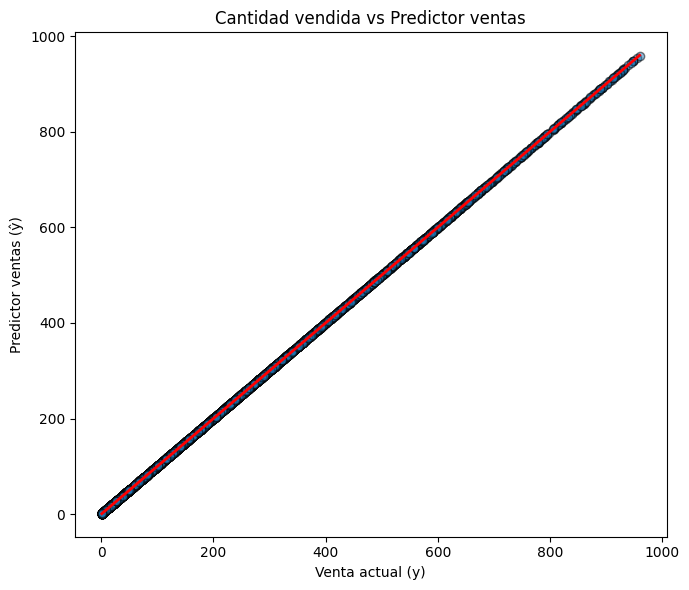

In [107]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Visualización de predicciones: Cantidad vendida vs Predictor ventas (Lasso) </h3>"))

# Predictions with the same scaling
y_pred_ls = lasso.predict(X_ls)

# 1. Scatter plot between actual and predicted values
plt.figure(figsize=(7, 6))
plt.scatter(y_ls, y_pred_ls, alpha=0.5, edgecolor='k')
plt.plot([y_ls.min(), y_ls.max()], [y_ls.min(), y_ls.max()], color='red', linestyle='-', linewidth=2, label='Ideal line: y = ŷ')
plt.title("Cantidad vendida vs Predictor ventas")
plt.xlabel("Venta actual (y)")
plt.ylabel("Predictor ventas (ŷ)")
plt.tight_layout()
plt.show()

In [108]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Medidas de rendimiento Lasso </h3>"))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluación del modelo con métricas de desempeño
#y_pred_ls = lasso.predict(X)
MSE_ls = mean_squared_error(y_ls, y_pred_ls)  # Error cuadrático medio
RMSE_ls = np.sqrt(MSE_ls)  # Raíz del error cuadrático medio
MAE_ls = mean_absolute_error(y_ls, y_pred_ls)  # Error absoluto medio
R2_ls = r2_score(y_ls, y_pred_ls)  # Coeficiente de determinación
n_nonzero_coef = np.sum(coef != 0)  # Número de coeficientes distintos de cero

# Imprimir los resultados de las métricas
print("Evaluación del modelo Lasso:")
print(f"MSE: {MSE_ls:.2f}")
print(f"RMSE: {RMSE_ls:.2f}")
print(f"MAE: {MAE_ls:.2f}")
print(f"R^2: {R2_ls:.4f}")
print(f"Número de coeficientes no nulos: {n_nonzero_coef}")

Evaluación del modelo Lasso:
MSE: 0.15
RMSE: 0.39
MAE: 0.32
R^2: 1.0000
Número de coeficientes no nulos: 0


**Paso 3: Verificación de Supuestos**  
Para cada modelo, verificar:  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

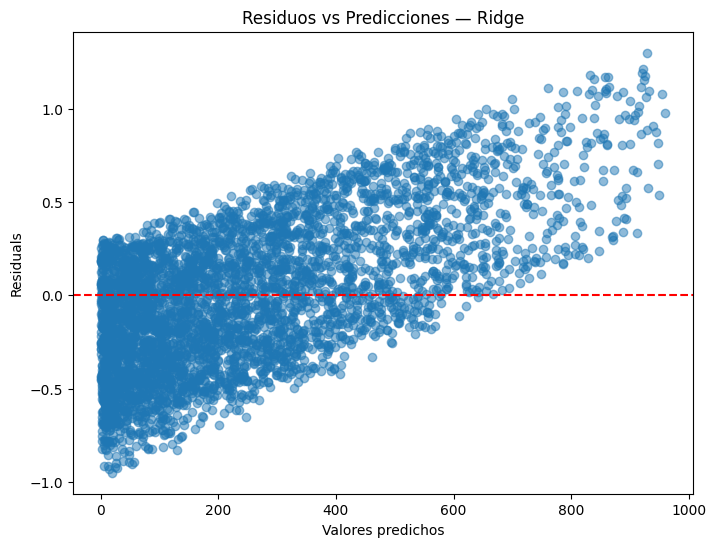

In [109]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Linealidad (gráfico de residuos vs predicciones) Modelo Lasso </h3>"))

# Calculate residuals
residuals_ls = y_ls - y_pred_ls

# Plotting residuals vs fitted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_ls, residuals_ls, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Predicciones — Ridge')
plt.xlabel('Valores predichos')
plt.ylabel('Residuals')
plt.show()

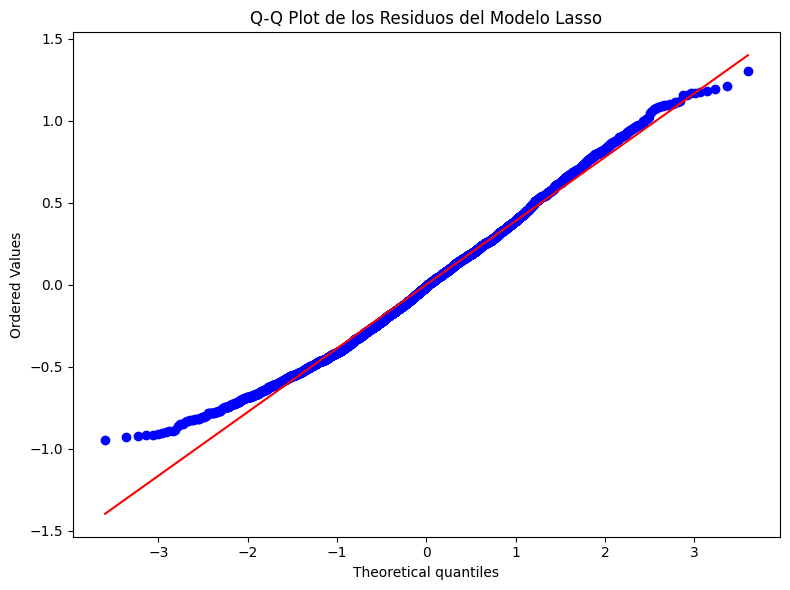

In [110]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Q-Q Plot para evaluar la normalidad de residuos — Lasso </h3>"))

import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals_ls, dist="norm", plot=plt)
plt.title("Q-Q Plot de los Residuos del Modelo Lasso")
plt.tight_layout()
plt.show()

In [111]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Pruebas de normalidad para los residuos del modelo Lasso </h3>"))

print(f"Media: {residuals_ls.mean():.3f}, Desviación estándar: {residuals_ls.std():.3f}")

# Shapiro–Wilk (adecuado para n <= ~5000)
shapiro_test_ls = stats.shapiro(residuals_ls)
print(f"Shapiro–Wilk: estadístico = {shapiro_test_ls.statistic:.5f}, p-valor = {shapiro_test_ls.pvalue:.5f}")

# D’Agostino–Pearson
dagostino_test_ls = stats.normaltest(residuals_ls)
print(f"D’Agostino–Pearson: estadístico = {dagostino_test_ls.statistic:.5f}, p-valor = {dagostino_test_ls.pvalue:.5f}")

# Kolmogorov–Smirnov (aprox., usando z estandarizado)
z = (residuals_ls - residuals_ls.mean()) / residuals_ls.std(ddof=1)
ks_test_ls = stats.kstest(z, 'norm')
print(f"Kolmogorov–Smirnov: estadístico = {ks_test_ls.statistic:.5f}, p-valor = {ks_test_ls.pvalue:.5f}")


Media: -0.000, Desviación estándar: 0.390
Shapiro–Wilk: estadístico = 0.99184, p-valor = 0.00000
D’Agostino–Pearson: estadístico = 74.52156, p-valor = 0.00000
Kolmogorov–Smirnov: estadístico = 0.02686, p-valor = 0.00383


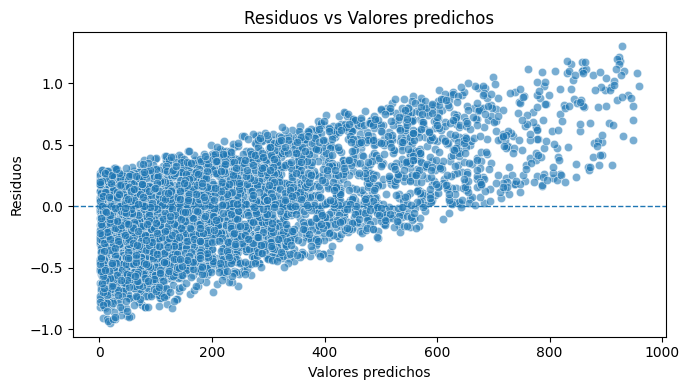

Breusch–Pagan p-value: 2.252e-76  ->  Heterocedasticidad
White test p-value:    5.981e-36  ->  Heterocedasticidad
Durbin–Watson: 2.007 (≈2 sugiere independencia; <2 autocorrelación positiva)


In [112]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Homocedasticidad modelo Lasso </h3>"))

import seaborn as sns
from scipy import sparse
from statsmodels.stats.api import het_breuschpagan, het_white, durbin_watson
import statsmodels.api as sm

# Usar la MISMA matriz transformada que el modelo (post-preprocesamiento)
Xt = lasso.named_steps["preprocessor_ls"].transform(X_ls)
if sparse.issparse(Xt):
    Xt = Xt.toarray()

plt.figure(figsize=(7,4))
sns.scatterplot(x=y_pred_ls, y=residuals_ls, alpha=0.6)
plt.axhline(0, linestyle='--', linewidth=1)
plt.title("Residuos vs Valores predichos")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.tight_layout()
plt.show()


exog = sm.add_constant(Xt, has_constant="add")

bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuals_ls, exog)
white_stat, white_pvalue, _, _ = het_white(residuals_ls, exog)

print(f"Breusch–Pagan p-value: {bp_pvalue:.4g}  ->  "
      f"{'Heterocedasticidad' if bp_pvalue < 0.05 else 'El valor de p es mayor a 0.05; se asume homocedasticidad'}")
print(f"White test p-value:    {white_pvalue:.4g}  ->  "
      f"{'Heterocedasticidad' if white_pvalue < 0.05 else 'El valor de p es mayor a 0.05; se asume homocedasticidad'}")

dw = durbin_watson(residuals_ls)
print(f"Durbin–Watson: {dw:.3f} (≈2 sugiere independencia; <2 autocorrelación positiva)")

# **Regresión Ridge**

#### **🔹 Paso 1: Preprocesamiento**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  


In [113]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Seleccionar las características relevantes para el modelo Ridge </h3>"))

#Variable objetivo
target_rdg = "Quantity Sold (liters/kg)"

features_rdg = [
    "Number of Cows",
    "Total Land Area (acres)",
    "Quantity (liters/kg)",
    "Price per Unit",
    "Shelf Life (days)",
    "Price per Unit (sold)",
    "Farm Size",
    "Location",
    "Brand",
    "Product Name",
    "Storage Condition",
    "Sales Channel",
    "Customer Location",
    "Quantity in Stock (liters/kg)",
    "Minimum Stock Threshold (liters/kg)",
    "Reorder Quantity (liters/kg)",
]

date_derived_candidates = [
    "days_since_production",  # (Date - Production Date).days
    "days_to_expiry",         # (Expiration Date - Date).days
    "day_of_week",            # Date.dt.dayofweek
    "month",                  # Date.dt.month
    "year",                   # Date.dt.year
]


df_rdg = df[features_rdg + [target_rdg]].copy()

display(HTML("<h3 style='color:blue; font-size:14px;'> Variables o características (Features) seleccionadas </h3>"))
print(features_rdg)

print("\n")
display(HTML("<h3 style='color:blue; font-size:14px;'> variable objetivo (Target) </h3>"))
print(target_rdg)

print("\n")
display(HTML("<h3 style='color:blue; font-size:14px;'> Tamaño del dataframe </h3>"))
print(df_rdg.shape)

print("\n")
display(HTML("<h3 style='color:blue; font-size:14px;'> Primeras filas del dataframe </h3>"))
print(df_rdg.head())


['Number of Cows', 'Total Land Area (acres)', 'Quantity (liters/kg)', 'Price per Unit', 'Shelf Life (days)', 'Price per Unit (sold)', 'Farm Size', 'Location', 'Brand', 'Product Name', 'Storage Condition', 'Sales Channel', 'Customer Location', 'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)', 'Reorder Quantity (liters/kg)']




Quantity Sold (liters/kg)




(4325, 17)




   Number of Cows  Total Land Area (acres)  Quantity (liters/kg)  \
0              96                   310.84                222.40   
1              44                    19.19                687.48   
2              24                   581.69                503.48   
3              89                   908.00                823.36   
4              21                   861.95                147.77   

   Price per Unit  Shelf Life (days)  Price per Unit (sold) Farm Size  \
0           85.72                 25                  82.24    Medium   
1           42.61                 22                  39.24     Large   
2           36.50                 30                  33.81    Medium   
3           26.52                 72                  28.92     Small   
4           83.85                 11                  83.07    Medium   

        Location                 Brand Product Name Storage Condition  \
0      Telangana           Dodla Dairy    Ice Cream            Frozen   
1  Utt

In [114]:
X_cols_rdg = [c for c in df_rdg.columns if c != target_rdg]

# Detección por dtype
numeric_features_rdg = df_rdg[X_cols_rdg].select_dtypes(include=["number"]).columns.tolist()
categorical_features_rdg = [c for c in X_cols_rdg if c not in numeric_features_rdg]

for c in ["day_of_week", "month", "year"]:
    if c in numeric_features_rdg:
        numeric_features_rdg.remove(c)
        categorical_features_rdg.append(c)


display(HTML("<h3 style='color:blue; font-size:18px;'> Variables numéricas </h3>"))
print("Numéricas:", numeric_features_rdg)

display(HTML("<h3 style='color:blue; font-size:18px;'> Variables categóricas </h3>"))
print("Categóricas:", categorical_features_rdg)

Numéricas: ['Number of Cows', 'Total Land Area (acres)', 'Quantity (liters/kg)', 'Price per Unit', 'Shelf Life (days)', 'Price per Unit (sold)', 'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)', 'Reorder Quantity (liters/kg)']


Categóricas: ['Farm Size', 'Location', 'Brand', 'Product Name', 'Storage Condition', 'Sales Channel', 'Customer Location']


In [115]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Codificar variables categóricas con OneHotEncoder - Ridge</h3>"))
display(HTML("<h3 style='color:blue; font-size:18px;'> Estandarizar variables numéricas con StandardScaler - Ridge </h3>"))

print('\n')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Crear un preprocesador para escalar las variables numéricas y codificar las categóricas
preprocessor_rdg = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features_rdg),   # Normaliza las variables numéricas
        ("cat", OneHotEncoder(drop='first'), categorical_features_rdg)   # Convierte categóricas a variables dummy (removed sparse=False)
    ],
    remainder="drop"
)

print(preprocessor_rdg)



ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Number of Cows', 'Total Land Area (acres)',
                                  'Quantity (liters/kg)', 'Price per Unit',
                                  'Shelf Life (days)', 'Price per Unit (sold)',
                                  'Quantity in Stock (liters/kg)',
                                  'Minimum Stock Threshold (liters/kg)',
                                  'Reorder Quantity (liters/kg)']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['Farm Size', 'Location', 'Brand',
                                  'Product Name', 'Storage Condition',
                                  'Sales Channel', 'Customer Location'])])


#### **🔹 Paso 2: Modelado Ridge**   
  
1. Ajustar el modelo con los hiperparámetros dados `alpha=1.0`.  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

In [116]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Definir el parámetro de regularización alpha=1.0 para Ridge </h3>"))

# Definir un valor fijo de alpha
alpha_rdg = 1.0

# Import the Pipeline class
from sklearn.pipeline import Pipeline
# Import the Ridge class
from sklearn.linear_model import Ridge

# Crear un pipeline con Ridge
ridge = Pipeline([
    ("preprocessor_rdg", preprocessor_rdg),
    ("ridge", Ridge(alpha=alpha_rdg))
])

print(ridge)


Pipeline(steps=[('preprocessor_rdg',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number of Cows',
                                                   'Total Land Area (acres)',
                                                   'Quantity (liters/kg)',
                                                   'Price per Unit',
                                                   'Shelf Life (days)',
                                                   'Price per Unit (sold)',
                                                   'Quantity in Stock '
                                                   '(liters/kg)',
                                                   'Minimum Stock Threshold '
                                                   '(liters/kg)',
                                                   'Reorder Quantity '
                                                   '(liters/kg)']),
                            

In [117]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Regresión Ridge </h3>"))

# Separar las variables predictoras (X) y la variable objetivo (y)
X_rdg = df[features_rdg]
y_rdg = df[target_rdg]

# Entrenar el modelo Ridge con los datos
ridge.fit(X_rdg, y_rdg)

# Obtener los coeficientes después del ajuste
feature_names_rdg = numeric_features_rdg + list(ridge.named_steps["preprocessor_rdg"].named_transformers_["cat"].get_feature_names_out())
coef_rdg = pd.Series(ridge.named_steps["ridge"].coef_, index=feature_names_rdg)
print(f"\nCoeficientes estimados:\n{coef_rdg}")

coefficients_rdg = ridge.named_steps["ridge"].coef_
intercept_rdg = ridge.named_steps["ridge"].intercept_

print(f"Término independiente estimado: {intercept_rdg:.4f}")

print('\n')
equation_rdg = f"Reorder Quantity = {intercept_rdg:.4f} "
for i, coef_val in enumerate(coefficients_rdg):
  equation_rdg += f"+ ({coef_val:.4f} * {feature_names_rdg[i]}) "

print(equation_rdg)


Coeficientes estimados:
Number of Cows                       0.002843
Total Land Area (acres)              0.001477
Quantity (liters/kg)               288.755821
Price per Unit                       0.098430
Shelf Life (days)                   -0.087421
                                      ...    
Customer Location_Rajasthan         -0.171234
Customer Location_Tamil Nadu        -0.140527
Customer Location_Telangana         -0.155431
Customer Location_Uttar Pradesh     -0.145118
Customer Location_West Bengal       -0.126359
Length: 64, dtype: float64
Término independiente estimado: 248.2741


Reorder Quantity = 248.2741 + (0.0028 * Number of Cows) + (0.0015 * Total Land Area (acres)) + (288.7558 * Quantity (liters/kg)) + (0.0984 * Price per Unit) + (-0.0874 * Shelf Life (days)) + (-0.0955 * Price per Unit (sold)) + (-223.4095 * Quantity in Stock (liters/kg)) + (-0.0074 * Minimum Stock Threshold (liters/kg)) + (-0.0060 * Reorder Quantity (liters/kg)) + (-0.0007 * Farm Size_Medium) + (-

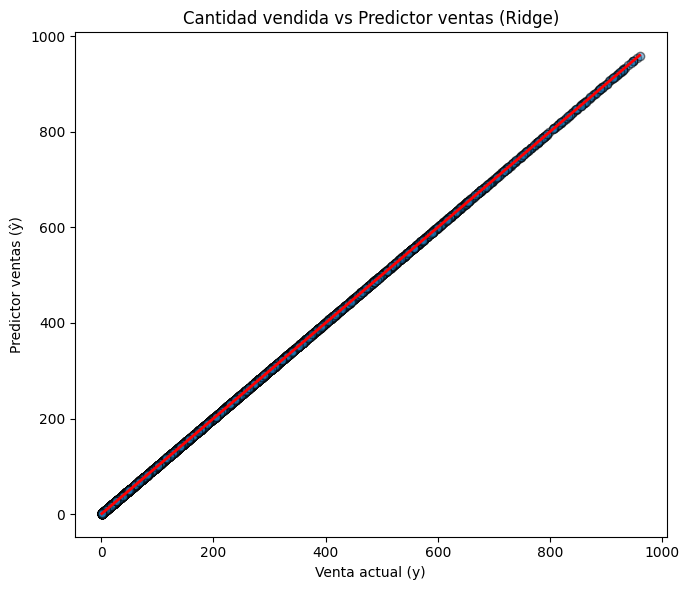

In [118]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Visualización de predicciones: Cantidad vendida vs Predictor ventas (Ridge) </h3>"))

# Predictions with the same scaling
y_pred_rdg = ridge.predict(X_rdg)

# Scatter plot between actual and predicted values
plt.figure(figsize=(7, 6))
plt.scatter(y_rdg, y_pred_rdg, alpha=0.5, edgecolor='k')
plt.plot([y_rdg.min(), y_rdg.max()], [y_rdg.min(), y_rdg.max()], color='red', linestyle='-', linewidth=2, label='Ideal line: y = ŷ')
plt.title("Cantidad vendida vs Predictor ventas (Ridge)")
plt.xlabel("Venta actual (y)")
plt.ylabel("Predictor ventas (ŷ)")
plt.tight_layout()
plt.show()

In [119]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Medidas de rendimiento Ridge </h3>"))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation of the Ridge model
MSE_rdg = mean_squared_error(y_rdg, y_pred_rdg)  # Mean Squared Error
RMSE_rdg = np.sqrt(MSE_rdg)  # Root Mean Squared Error
MAE_rdg = mean_absolute_error(y_rdg, y_pred_rdg)  # Mean Absolute Error
R2_rdg = r2_score(y_rdg, y_pred_rdg)  # Coefficient of Determination
n_nonzero_coef_rdg = np.sum(coef_rdg != 0)  # Number of non-zero coefficients

# Print the evaluation results
print("Evaluación del modelo Ridge:")
print(f"MSE: {MSE_rdg:.2f}")
print(f"RMSE: {RMSE_rdg:.2f}")
print(f"MAE: {MAE_rdg:.2f}")
print(f"R^2: {R2_rdg:.4f}")
print(f"Número de coeficientes no nulos: {n_nonzero_coef_rdg}")

Evaluación del modelo Ridge:
MSE: 0.11
RMSE: 0.33
MAE: 0.28
R^2: 1.0000
Número de coeficientes no nulos: 64


**Paso 3: Verificación de Supuestos**  
Para cada modelo, verificar:  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

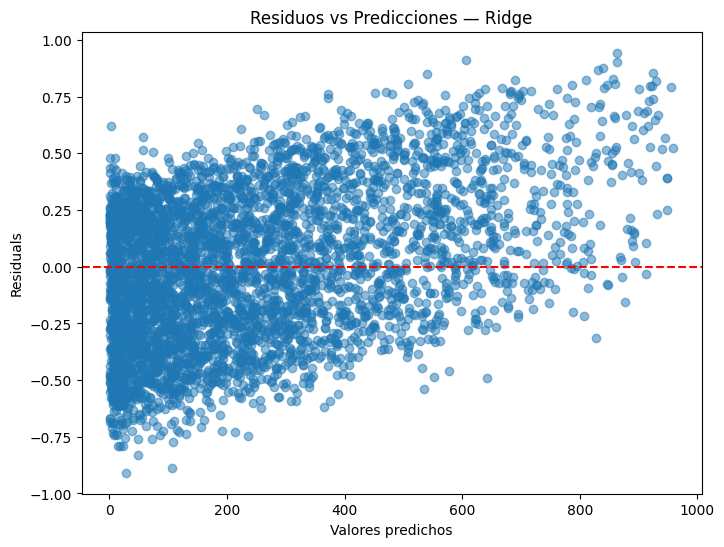

In [120]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Linealidad (gráfico de residuos vs predicciones) Modelo Ridge </h3>"))

# Calculate residuals
residuals_rdg = y_rdg - y_pred_rdg

# Plotting residuals vs fitted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rdg, residuals_rdg, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos vs Predicciones — Ridge')
plt.xlabel('Valores predichos')
plt.ylabel('Residuals')
plt.show()

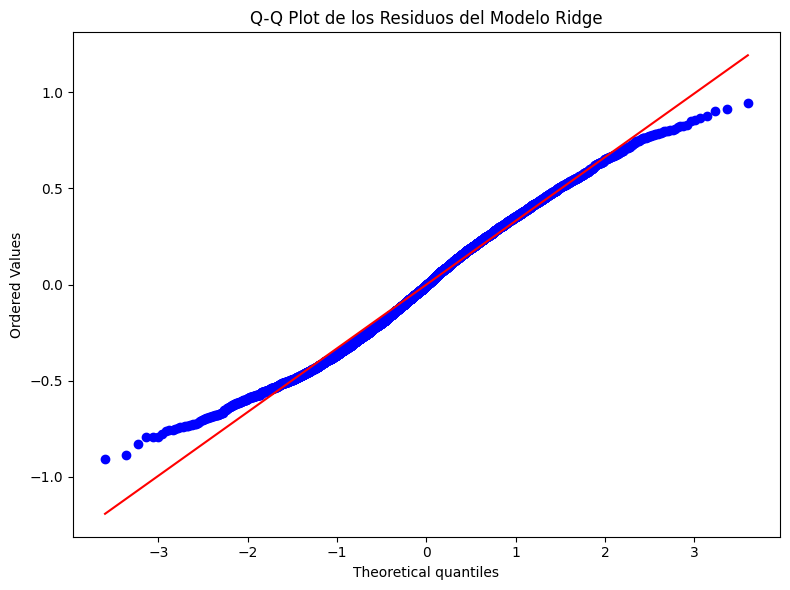

In [121]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Q-Q Plot para evaluar la normalidad de residuos — Ridge </h3>"))

import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals_rdg, dist="norm", plot=plt)
plt.title("Q-Q Plot de los Residuos del Modelo Ridge")
plt.tight_layout()
plt.show()

In [122]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Pruebas de normalidad para los residuos del modelo Ridge </h3>"))

print(f"Media: {residuals_rdg.mean():.3f}, Desviación estándar: {residuals_rdg.std():.3f}")

# Shapiro–Wilk (adecuado para n <= ~5000)
shapiro_test_rdg = stats.shapiro(residuals_rdg)
print(f"Shapiro–Wilk: estadístico = {shapiro_test_rdg.statistic:.5f}, p-valor = {shapiro_test_rdg.pvalue:.5f}")

# D’Agostino–Pearson
dagostino_test_rdg = stats.normaltest(residuals_rdg)
print(f"D’Agostino–Pearson: estadístico = {dagostino_test_rdg.statistic:.5f}, p-valor = {dagostino_test_rdg.pvalue:.5f}")

# Kolmogorov–Smirnov (aprox., usando z estandarizado)
z = (residuals_rdg - residuals_rdg.mean()) / residuals_rdg.std(ddof=1)
ks_test_rdg = stats.kstest(z, 'norm')
print(f"Kolmogorov–Smirnov: estadístico = {ks_test_rdg.statistic:.5f}, p-valor = {ks_test_rdg.pvalue:.5f}")


Media: 0.000, Desviación estándar: 0.332
Shapiro–Wilk: estadístico = 0.99097, p-valor = 0.00000
D’Agostino–Pearson: estadístico = 201.55645, p-valor = 0.00000
Kolmogorov–Smirnov: estadístico = 0.03478, p-valor = 0.00006


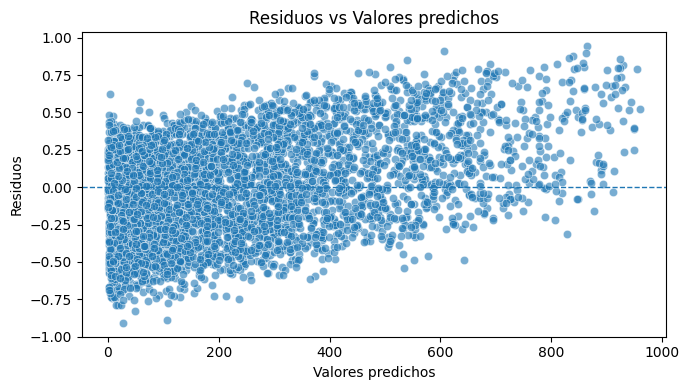

Breusch–Pagan p-value: 4.914e-14  ->  Heterocedasticidad
White test p-value:    3.466e-08  ->  Heterocedasticidad
Durbin–Watson: 1.991 (≈2 sugiere independencia; <2 autocorrelación positiva)


In [123]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Homocedasticidad modelo Ridge </h3>"))

import seaborn as sns
from scipy import sparse
from statsmodels.stats.api import het_breuschpagan, het_white, durbin_watson
import statsmodels.api as sm

# Usar la MISMA matriz transformada que el modelo (post-preprocesamiento)
Xt = ridge.named_steps["preprocessor_rdg"].transform(X_rdg)
if sparse.issparse(Xt):
    Xt = Xt.toarray()

plt.figure(figsize=(7,4))
sns.scatterplot(x=y_pred_rdg, y=residuals_rdg, alpha=0.6)
plt.axhline(0, linestyle='--', linewidth=1)
plt.title("Residuos vs Valores predichos")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.tight_layout()
plt.show()


exog = sm.add_constant(Xt, has_constant="add")

bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuals_rdg, exog)
white_stat, white_pvalue, _, _ = het_white(residuals_rdg, exog)

print(f"Breusch–Pagan p-value: {bp_pvalue:.4g}  ->  "
      f"{'Heterocedasticidad' if bp_pvalue < 0.05 else 'El valor de p es mayor a 0.05; se asume homocedasticidad'}")
print(f"White test p-value:    {white_pvalue:.4g}  ->  "
      f"{'Heterocedasticidad' if white_pvalue < 0.05 else 'El valor de p es mayor a 0.05; se asume homocedasticidad'}")

dw = durbin_watson(residuals_rdg)
print(f"Durbin–Watson: {dw:.3f} (≈2 sugiere independencia; <2 autocorrelación positiva)")

In [124]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Cálculo de VIF (Multicolinealidad) — Modelo Ridge </h3>"))

from scipy import sparse
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 1) Obtener la MISMA X transformada que usó el pipeline
Xt = ridge.named_steps["preprocessor_rdg"].transform(X_rdg)
if sparse.issparse(Xt):
    Xt = Xt.toarray()

# 2) DataFrame con nombres correctos
feat_names = ridge.named_steps["preprocessor_rdg"].get_feature_names_out()
X_transformed_df = pd.DataFrame(Xt, columns=feat_names, index=X_rdg.index)

# 3) (Silencioso) quitar columnas de varianza cero para evitar VIF infinito
zero_var_cols = X_transformed_df.columns[X_transformed_df.std(ddof=0) == 0]
if len(zero_var_cols) > 0:
    X_transformed_df = X_transformed_df.drop(columns=zero_var_cols)

# 4) Agregar constante y calcular VIF (excluye la constante)
X_with_const = sm.add_constant(X_transformed_df, has_constant="add")

vif_rows = []
for i, col in enumerate(X_with_const.columns):
    if col == "const":
        continue
    vif_val = variance_inflation_factor(X_with_const.values, i)
    vif_rows.append({"Variable": col, "VIF": float(vif_val)})

vif_data = pd.DataFrame(vif_rows).sort_values("VIF", ascending=False).reset_index(drop=True)
print("\n### Análisis de Multicolinealidad (VIF) — Ridge ###")
print(vif_data.round({"VIF": 4}))

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide




### Análisis de Multicolinealidad (VIF) — Ridge ###
                                    Variable     VIF
0          cat__Storage Condition_Tetra Pack     inf
1        cat__Storage Condition_Refrigerated     inf
2                     cat__Product Name_Milk     inf
3              cat__Storage Condition_Frozen     inf
4    cat__Storage Condition_Polythene Packet     inf
..                                       ...     ...
59                     cat__Farm Size_Medium  1.3408
60              num__Total Land Area (acres)  1.0180
61         num__Reorder Quantity (liters/kg)  1.0158
62  num__Minimum Stock Threshold (liters/kg)  1.0143
63                       num__Number of Cows  1.0138

[64 rows x 2 columns]


# **Comparación de Modelos**

1. Comparar las métricas de rendimiento (MSE, R²) de ambos modelos.
2. Analizar los coeficientes de ambos modelos para identificar las variables más importantes y cómo la regularización afectó su magnitud.

In [125]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Comparación de métricas de rendimiento </h3>"))

results = pd.DataFrame({
    'Model': ['Lasso', 'Ridge'],
    'MSE': [MSE_ls, MSE_rdg],
    'RMSE': [RMSE_ls, RMSE_rdg],
    'MAE': [MAE_ls, MAE_rdg],
    'R²': [R2_ls, R2_rdg],
    'Non-zero Coefficients': [n_nonzero_coef, n_nonzero_coef_rdg]
})

print(results)


   Model       MSE      RMSE       MAE        R²  Non-zero Coefficients
0  Lasso  0.151960  0.389821  0.316652  0.999997                      0
1  Ridge  0.110455  0.332347  0.277186  0.999998                     64


In [126]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Comparación de coeficientes </h3>"))

# Create dataframes for coefficients
# Ensure coef and coef_rdg are pandas Series before calling reset_index()

# Use the feature_names list to create the Lasso coefficient Series
coef_ls_df = pd.DataFrame({'Feature': feature_names, 'Lasso_Coef': coef})
coef_rdg_df = pd.Series(coef_rdg).reset_index().rename(columns={'index': 'Feature', 0: 'Ridge_Coef'})

# Merge the dataframes
coef_comparison = pd.merge(coef_ls_df, coef_rdg_df, on='Feature', how='outer')

# Sort by absolute difference or Lasso coefficient for better visualization
coef_comparison['Abs_Diff'] = np.abs(coef_comparison['Lasso_Coef'] - coef_comparison['Ridge_Coef'])
coef_comparison = coef_comparison.sort_values(by='Abs_Diff', ascending=False).reset_index(drop=True)

print(coef_comparison)

                          Feature  Lasso_Coef  Ridge_Coef    Abs_Diff
0            Quantity (liters/kg)         0.0  288.755821  288.755821
1   Quantity in Stock (liters/kg)         0.0 -223.409500  223.409500
2             Product Name_Cheese         0.0    0.301724    0.301724
3               Product Name_Ghee         0.0    0.267127    0.267127
4          Brand_Parag Milk Foods         0.0    0.266172    0.266172
..                            ...         ...         ...         ...
59                 Number of Cows         0.0    0.002843    0.002843
60             Brand_Palle2patnam         0.0   -0.002366    0.002366
61        Total Land Area (acres)         0.0    0.001477    0.001477
62              Brand_Dodla Dairy         0.0    0.001394    0.001394
63               Farm Size_Medium         0.0   -0.000740    0.000740

[64 rows x 4 columns]


# **Predecir la cantidad de reabasto recomendada**

In [127]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Conversión y corrección de tipos de datos. </h3>"))

df['Date'] = pd.to_datetime(df['Date'])
df['Production Date'] = pd.to_datetime(df['Production Date'])
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'])

print(df.dtypes)

display(HTML("<h3 style='color:blue; font-size:14px;'> Transformar las variables object a category del Dataset </h3>"))
for col in df.select_dtypes(include="object"):
    df[col] = df[col].astype("category")
print(df.dtypes)
print('\n')

display(HTML("<h3 style='color:blue; font-size:14px;'> Información del Dataset </h3>"))
print(df.info())
print('\n')

Location                                     category
Total Land Area (acres)                       float64
Number of Cows                                  int64
Farm Size                                    category
Date                                   datetime64[ns]
Product ID                                      int64
Product Name                                 category
Brand                                        category
Quantity (liters/kg)                          float64
Price per Unit                                float64
Total Value                                   float64
Shelf Life (days)                               int64
Storage Condition                            category
Production Date                        datetime64[ns]
Expiration Date                        datetime64[ns]
Quantity Sold (liters/kg)                       int64
Price per Unit (sold)                         float64
Approx. Total Revenue(INR)                    float64
Customer Location           

Location                                     category
Total Land Area (acres)                       float64
Number of Cows                                  int64
Farm Size                                    category
Date                                   datetime64[ns]
Product ID                                      int64
Product Name                                 category
Brand                                        category
Quantity (liters/kg)                          float64
Price per Unit                                float64
Total Value                                   float64
Shelf Life (days)                               int64
Storage Condition                            category
Production Date                        datetime64[ns]
Expiration Date                        datetime64[ns]
Quantity Sold (liters/kg)                       int64
Price per Unit (sold)                         float64
Approx. Total Revenue(INR)                    float64
Customer Location           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Location                             4325 non-null   category      
 1   Total Land Area (acres)              4325 non-null   float64       
 2   Number of Cows                       4325 non-null   int64         
 3   Farm Size                            4325 non-null   category      
 4   Date                                 4325 non-null   datetime64[ns]
 5   Product ID                           4325 non-null   int64         
 6   Product Name                         4325 non-null   category      
 7   Brand                                4325 non-null   category      
 8   Quantity (liters/kg)                 4325 non-null   float64       
 9   Price per Unit                       4325 non-null   float64       
 10  Total Value 

In [128]:
display(HTML("<h3 style='color:blue; font-size:14px;'> Variable objetivo (Target) </h3>"))

target_ls_RQ = "Reorder Quantity (liters/kg)"
print("Target REAL:", target_ls_RQ)

print('\n')


display(HTML("<h3 style='color:blue; font-size:14px;'> Variables o características (Features) seleccionadas </h3>"))


features_ls_RQ = [
    # Inventario / política actual:
    "Quantity in Stock (liters/kg)",
    "Minimum Stock Threshold (liters/kg)",
    # Drivers de negocio:
    "Price per Unit (sold)",
    "Price per Unit",
    "Quantity (liters/kg)",
    # Vida de anaquel / producto / contexto:
    "Shelf Life (days)",
    "Number of Cows",
    "Total Land Area (acres)",
    "Farm Size",
    # Categóricas (contexto operacional):
    "Location", "Sales Channel", "Customer Location",
    "Brand", "Product Name",
]

print(features_ls_RQ)

df_ls_RQ = df[features_ls_RQ + [target_ls_RQ]].copy()

print("\n")
display(HTML("<h3 style='color:blue; font-size:14px;'> Tamaño del dataframe </h3>"))
print(df_ls_RQ.shape)

print("\n")
display(HTML("<h3 style='color:blue; font-size:14px;'> Primeras filas del dataframe </h3>"))
print(df_ls_RQ.head())



Target REAL: Reorder Quantity (liters/kg)




['Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)', 'Price per Unit (sold)', 'Price per Unit', 'Quantity (liters/kg)', 'Shelf Life (days)', 'Number of Cows', 'Total Land Area (acres)', 'Farm Size', 'Location', 'Sales Channel', 'Customer Location', 'Brand', 'Product Name']




(4325, 15)




   Quantity in Stock (liters/kg)  Minimum Stock Threshold (liters/kg)  \
0                            215                                19.55   
1                            129                                43.17   
2                            247                                15.10   
3                            222                                74.50   
4                              2                                76.02   

   Price per Unit (sold)  Price per Unit  Quantity (liters/kg)  \
0                  82.24           85.72                222.40   
1                  39.24           42.61                687.48   
2                  33.81           36.50                503.48   
3                  28.92           26.52                823.36   
4                  83.07           83.85                147.77   

   Shelf Life (days)  Number of Cows  Total Land Area (acres) Farm Size  \
0                 25              96                   310.84    Medium   
1             

In [129]:
X_cols_ls_RQ = [c for c in df_ls_RQ.columns if c != target_ls]

# Detección por dtype
numeric_features_ls_RQ = df_ls[X_cols_ls_RQ].select_dtypes(include=["number"]).columns.tolist()
categorical_features_ls_RQ = [c for c in X_cols_ls_RQ if c not in numeric_features_ls_RQ]

for c in ["day_of_week", "month", "year"]:
    if c in numeric_features_ls_RQ:
        numeric_features_ls_RQ.remove(c)
        categorical_features_ls_RQ.append(c)


display(HTML("<h3 style='color:blue; font-size:18px;'> Variables numéricas </h3>"))
print("Numéricas:", numeric_features_ls_RQ)

display(HTML("<h3 style='color:blue; font-size:18px;'> Variables categóricas </h3>"))
print("Categóricas:", categorical_features_ls_RQ)

Numéricas: ['Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)', 'Price per Unit (sold)', 'Price per Unit', 'Quantity (liters/kg)', 'Shelf Life (days)', 'Number of Cows', 'Total Land Area (acres)', 'Reorder Quantity (liters/kg)']


Categóricas: ['Farm Size', 'Location', 'Sales Channel', 'Customer Location', 'Brand', 'Product Name']


In [130]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Codificar variables categóricas con OneHotEncoder </h3>"))
display(HTML("<h3 style='color:blue; font-size:18px;'> Estandarizar variables numéricas con StandardScaler </h3>"))

print('\n')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Crear un preprocesador para escalar las variables numéricas y codificar las categóricas
preprocessor_ls_RQ = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features_ls_RQ),   # Normaliza las variables numéricas
        ("cat", OneHotEncoder(drop='first'), categorical_features_ls_RQ)   # Convierte categóricas a variables dummy (removed sparse=False)
    ],
    remainder="drop"
)

print(preprocessor_ls_RQ)



ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Quantity in Stock (liters/kg)',
                                  'Minimum Stock Threshold (liters/kg)',
                                  'Price per Unit (sold)', 'Price per Unit',
                                  'Quantity (liters/kg)', 'Shelf Life (days)',
                                  'Number of Cows', 'Total Land Area (acres)',
                                  'Reorder Quantity (liters/kg)']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['Farm Size', 'Location', 'Sales Channel',
                                  'Customer Location', 'Brand',
                                  'Product Name'])])


In [131]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Definir el parámetro de regularización (alpha) </h3>"))

alpha = 0.1  # Controla la penalización sobre los coeficientes

# Import the Pipeline class
from sklearn.pipeline import Pipeline
# Import the Lasso class
from sklearn.linear_model import Lasso


# Crear un pipeline que primero preprocesa los datos y luego aplica regresión Lasso
lasso_RQ = Pipeline([
    ("preprocessor_ls_RQ", preprocessor_ls_RQ),
    ("lasso", Lasso(alpha=alpha))
])

print(lasso_RQ)

Pipeline(steps=[('preprocessor_ls_RQ',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Quantity in Stock '
                                                   '(liters/kg)',
                                                   'Minimum Stock Threshold '
                                                   '(liters/kg)',
                                                   'Price per Unit (sold)',
                                                   'Price per Unit',
                                                   'Quantity (liters/kg)',
                                                   'Shelf Life (days)',
                                                   'Number of Cows',
                                                   'Total Land Area (acres)',
                                                   'Reorder Quantity '
                                                   '(liters/kg)']),
                          

In [132]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Regresión Lasso </h3>"))

# Separar las variables predictoras (X) y la variable objetivo (y)
X_ls_RQ = df[features_ls_RQ]
y_ls_RQ = df[target_ls_RQ]

# Remove the target variable from the numeric features list
numeric_features_ls_RQ = [c for c in numeric_features_ls_RQ if c != target_ls_RQ]

# Update the preprocessor with the corrected numeric features list
preprocessor_ls_RQ = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features_ls_RQ),   # Normaliza las variables numéricas
        ("cat", OneHotEncoder(drop='first'), categorical_features_ls_RQ)   # Convierte categóricas a variables dummy (removed sparse=False)
    ],
    remainder="drop"
)

# Update the pipeline with the corrected preprocessor
lasso_RQ = Pipeline([
    ("preprocessor_ls_RQ", preprocessor_ls_RQ),
    ("lasso", Lasso(alpha=alpha))
])


# Entrenar el modelo Lasso con los datos
lasso_RQ.fit(X_ls_RQ, y_ls_RQ)

# Obtener los coeficientes después del ajuste
feature_names_RQ = numeric_features_ls_RQ + list(lasso_RQ.named_steps["preprocessor_ls_RQ"].named_transformers_["cat"].get_feature_names_out())
coef_RQ = pd.Series(lasso_RQ.named_steps["lasso"].coef_, index=feature_names_RQ)
print(f"\nCoeficientes estimados:\n{coef_RQ}")

coefficients_ls_RQ = lasso_RQ.named_steps["lasso"].coef_
intercept_ls_RQ = lasso_RQ.named_steps["lasso"].intercept_

print(f"Término independiente estimado: {intercept_ls_RQ:.4f}")

print('\n')
equation = f"Charges = {intercept_ls_RQ:.4f} "
for i, coef in enumerate(coefficients_ls_RQ):
  equation += f"+ ({coef:.4f} * {feature_names_RQ[i]}) "

print(equation) #se obtiene el modelo con los coeficientes


Coeficientes estimados:
Quantity in Stock (liters/kg)         -0.140939
Minimum Stock Threshold (liters/kg)    0.743810
Price per Unit (sold)                 -0.000000
Price per Unit                         0.196913
Quantity (liters/kg)                   0.219496
Shelf Life (days)                     -0.337506
Number of Cows                         1.458007
Total Land Area (acres)                0.781112
Farm Size_Medium                      -0.379686
Farm Size_Small                        0.000000
Location_Chandigarh                    1.249321
Location_Delhi                        -0.000000
Location_Gujarat                       0.878700
Location_Haryana                       5.794680
Location_Jharkhand                     0.450449
Location_Karnataka                     0.077128
Location_Kerala                       -0.000000
Location_Madhya Pradesh               -0.000000
Location_Maharashtra                  -0.963322
Location_Rajasthan                     1.523461
Location_Tamil 

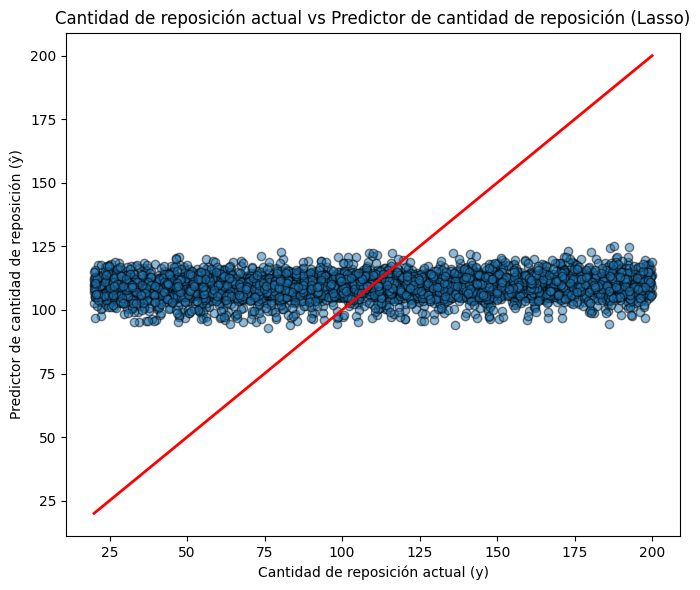

In [133]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Visualización de predicciones: Cantidad de reposición actual vs Predictor de cantidad de reposición (Lasso) </h3>"))

# Predictions with the same scaling
y_pred_ls_RQ = lasso_RQ.predict(X_ls_RQ)

# 1. Scatter plot between actual and predicted values
plt.figure(figsize=(7, 6))
plt.scatter(y_ls_RQ, y_pred_ls_RQ, alpha=0.5, edgecolor='k')
plt.plot([y_ls_RQ.min(), y_ls_RQ.max()], [y_ls_RQ.min(), y_ls_RQ.max()], color='red', linestyle='-', linewidth=2, label='Ideal line: y = ŷ')
plt.title("Cantidad de reposición actual vs Predictor de cantidad de reposición (Lasso)")
plt.xlabel("Cantidad de reposición actual (y)")
plt.ylabel("Predictor de cantidad de reposición (ŷ)")
plt.tight_layout()
plt.show()

In [134]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Medidas de rendimiento Lasso </h3>"))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluación del modelo con métricas de desempeño
MSE_ls_RQ = mean_squared_error(y_ls_RQ, y_pred_ls_RQ)  # Error cuadrático medio
RMSE_ls_RQ = np.sqrt(MSE_ls_RQ)  # Raíz del error cuadrático medio
MAE_ls_RQ = mean_absolute_error(y_ls_RQ, y_pred_ls_RQ)  # Error absoluto medio
R2_ls_RQ = r2_score(y_ls_RQ, y_pred_ls_RQ)  # Coeficiente de determinación
n_nonzero_coef_ls_RQ = np.sum(coef_RQ != 0)  # Número de coeficientes distintos de cero

# Imprimir los resultados de las métricas
print("Evaluación del modelo Lasso:")
print(f"MSE: {MSE_ls_RQ:.2f}")
print(f"RMSE: {RMSE_ls_RQ:.2f}")
print(f"MAE: {MAE_ls_RQ:.2f}")
print(f"R^2: {R2_ls_RQ:.4f}")
print(f"Número de coeficientes no nulos: {n_nonzero_coef_ls_RQ}")

Evaluación del modelo Lasso:
MSE: 2622.00
RMSE: 51.21
MAE: 44.12
R^2: 0.0112
Número de coeficientes no nulos: 37
